# Introduction :
# To explore valuable insights into match dynamics, team performances, and various factors affecting IPL Match outcomes.

#### Step 1 : Data Understanding

In [1]:
#importing all the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("matches.csv")

In [2]:
#Printing the first 5 rows of the dataframe
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

**Understanding the Meaning of each and every column**

**The id column refers to the match ID which is unique for every Match.**  

**The Season column refers to the Year in which the Match is Played.**  

**The City column refers to the city in which the match was played.**  

**The Date Column refers to the exact date the match was played.** 

**The Match Type Column refers to the type of Match that was played**

**The Player of the Match refers to the player that won the pom award for that particular match**

**The Venue Column refers to the ground name where the match was played**

**The Team1 Column refers to the home team name**

**The Team2 Column refers to the opposition team name**

**The Toss Winner Column refers to the Winner of the Toss in that game**

**The Toss Decision Column refers to the Decision of the toss in that game**

**The Winner Column refers to the team that won that particular game**

**The Result Column refers to the type of Win in that Game ie, by runs or by wickets**

**The Result Margin Column refers to the Margin of Winning either by runs or by number of wickets**

**The Target Runs Column refers to the Number of runs target set by the team that batted first**

**The Target Overs Column refers to the maximum number of overs in which the chasing team should chase down the target**

**The Super Over Column refers to either super over was played or not in that particular match**

**The Method Column refers to either the match was won by normal method or by DLS Method**

**The Umpire1 Column refers to the first umpire officiating that particular match**

**The Umpire2 Column refers to the second umpire officiating that particular match**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [5]:
df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


**Since Match ID is just for unique value for each match, we would be neglecting the statistics related to Match ID**

**Since the result margin is dependent on result type, we would be neglecting the statistics related to result margin(In this step only)**



# Key Insights

**The Average Score by the Batting First Teams in the IPL is approximately 166 runs**

**The Lowest Score by the Batting First Teams in the IPL is 43 Runs**

**In 75% of the Matches, the Team Batting First has set a target of less than 188 runs**

**About 50% of the Matches, the Team Batting First has set a target of less than 167 runs**

**In just 25% of the Matches, the Team Batting First has scored more than 187 runs**

In [6]:
df.target_overs.quantile(0.02)

np.float64(14.82)

**Approximately 2% of all the IPL Matches Played have been played less than 15 overs in the 2nd innings**



#### Step 2 : Data Cleaning

In [7]:
df.isna().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [8]:
#Replacing the null values of result_margin with median value
df['result_margin'] = df['result_margin'].fillna(df['result_margin'].median());

In [9]:
#Replacing the null values of winner column with mode value
df['winner'] = df['winner'].fillna(df['winner'].mode)

In [10]:
df.isna().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin         0
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [11]:
#Deleting all the rows where player_of_match is null
df.dropna(subset=['player_of_match'], inplace=True)

In [12]:
#Dropping the rows where city is null
df.dropna(subset=['city'],inplace=True)

In [13]:
#Replacing NaN Values of Method Column with "Normal"
df['method'] = df['method'].fillna("Normal")

In [14]:
#Final Cleaned Data
df.isna().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [15]:
df.shape

(1039, 20)

In [16]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,Normal,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Normal,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,Normal,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,Normal,BF Bowden,K Hariharan


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1039 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1039 non-null   int64  
 1   season           1039 non-null   object 
 2   city             1039 non-null   object 
 3   date             1039 non-null   object 
 4   match_type       1039 non-null   object 
 5   player_of_match  1039 non-null   object 
 6   venue            1039 non-null   object 
 7   team1            1039 non-null   object 
 8   team2            1039 non-null   object 
 9   toss_winner      1039 non-null   object 
 10  toss_decision    1039 non-null   object 
 11  winner           1039 non-null   object 
 12  result           1039 non-null   object 
 13  result_margin    1039 non-null   float64
 14  target_runs      1039 non-null   float64
 15  target_overs     1039 non-null   float64
 16  super_over       1039 non-null   object 
 17  method           10

In [18]:
#Converting the date column to date dtype
df['date'] = pd.to_datetime(df['date'],errors='coerce')

In [19]:
#Convert the result_margin column to int type as match result cannot be in points
df['result_margin'] = df['result_margin'].astype(int)

In [20]:
#Convert the target runs column to int type as runs cannot be in points
df['target_runs'] = df['target_runs'].astype(int)

In [21]:
df['super_over'] = df['super_over'].replace("N","No")
df['super_over'] = df['super_over'].replace("Y","Yes")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1039 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1039 non-null   int64         
 1   season           1039 non-null   object        
 2   city             1039 non-null   object        
 3   date             1039 non-null   datetime64[ns]
 4   match_type       1039 non-null   object        
 5   player_of_match  1039 non-null   object        
 6   venue            1039 non-null   object        
 7   team1            1039 non-null   object        
 8   team2            1039 non-null   object        
 9   toss_winner      1039 non-null   object        
 10  toss_decision    1039 non-null   object        
 11  winner           1039 non-null   object        
 12  result           1039 non-null   object        
 13  result_margin    1039 non-null   int64         
 14  target_runs      1039 non-null   int64       

In [23]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan


In [24]:
df = df.replace("Delhi Daredevils","Delhi Capitals")
df = df.replace("Royal Challengers Bangalore","Royal Challengers Bengaluru")
df = df.replace("Kings XI Punjab","Punjab Kings")
df = df.replace("Deccan Chargers","Sunrisers Hyderabad")
df = df.replace("Rising Pune Supergiant","Rising Pune Supergiants")


In [25]:
teams = pd.concat([df['team1'],df['team2']]).value_counts()
teams

Mumbai Indians                 249
Kolkata Knight Riders          243
Sunrisers Hyderabad            242
Royal Challengers Bengaluru    238
Delhi Capitals                 234
Punjab Kings                   233
Chennai Super Kings            224
Rajasthan Royals               208
Pune Warriors                   45
Gujarat Titans                  45
Lucknow Super Giants            43
Gujarat Lions                   30
Rising Pune Supergiants         30
Kochi Tuskers Kerala            14
Name: count, dtype: int64

#### Step 3 : Feature Engineering

In [26]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan


In [27]:
#Creating 3 seperate columns "Year","Month",and "Date"
df['Year'] = df['date'].dt.year

In [28]:
df['Month'] = df['date'].dt.month

In [29]:
df['Day'] = df['date'].dt.day

In [30]:
pd.set_option('display.max_columns', None)
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20


In [31]:
#Removing date column
df = df.drop(columns = ['date'])

In [32]:
#Creating a column named "Home Team Outcome" which indicates whether the home team has won the match or not
df['Home_Team_Outcome'] = np.where(df['team1'] == df['winner'],"Win","Loss")

In [33]:
df.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win


In [34]:
#Creating a column named "Away Team Outcome" which indicates whether the away team has won the match or not
df['Away_Team_Outcome'] = np.where(df['Home_Team_Outcome'] == "Win","Loss","Win")

In [35]:
df.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss


In [36]:
#Creating a column named "Full_Match" which indicates whether the match played was full or was it a shortned match
df['Full_Match'] = np.where(df['method'] == "Normal","Full","Shortned")

#### Step 4 : Data Analsysis

# 1) Overall Match Analaysis
***Analyze the distribution of match results and trends over the years.***

In [37]:
team_performance_overall = df.groupby(['season', 'winner']).size().reset_index(name='wins')
team_performance_overall

,season,winner,wins
0,2007/08,Chennai Super Kings,9
1,2007/08,Delhi Capitals,7
2,2007/08,Kolkata Knight Riders,6
3,2007/08,Mumbai Indians,7
4,2007/08,Punjab Kings,10
...,...,...,...
139,2024,Mumbai Indians,4
140,2024,Punjab Kings,5
141,2024,Rajasthan Royals,9
142,2024,Royal Challengers Bengaluru,7


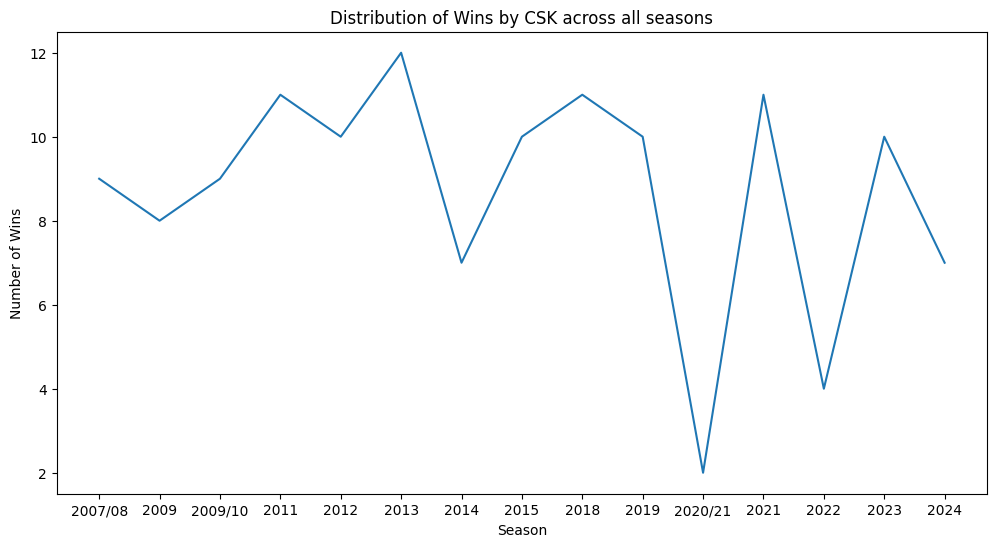

In [38]:
csk_performance = team_performance_overall[team_performance_overall['winner'] == 'Chennai Super Kings'][['winner','season', 'wins']]
plt.figure(figsize=(12,6))
plt.plot(csk_performance['season'],csk_performance['wins'])
plt.title("Distribution of Wins by CSK across all seasons")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()

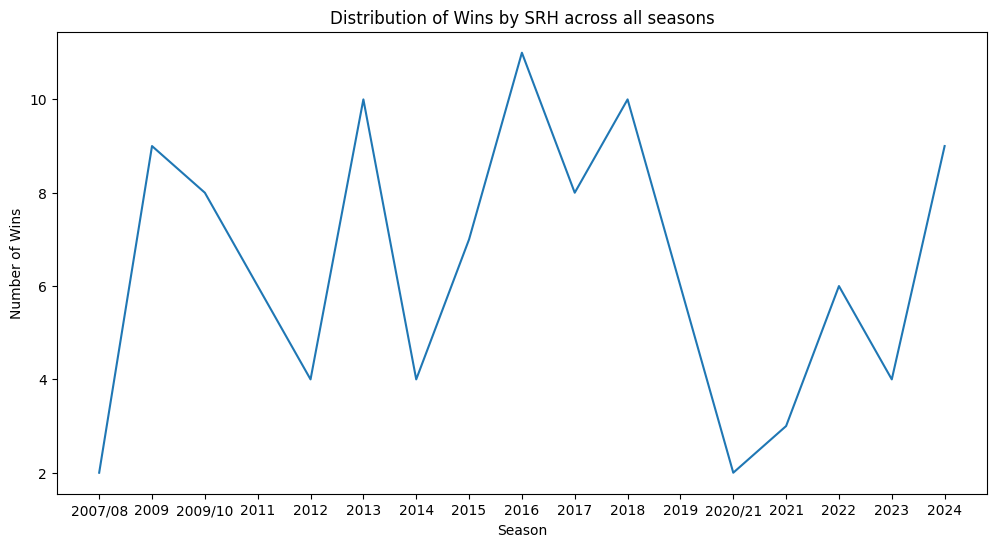

In [39]:
srh_performance = team_performance_overall[team_performance_overall['winner'] == 'Sunrisers Hyderabad'][['winner','season', 'wins']]
plt.figure(figsize=(12,6))
plt.plot(srh_performance['season'],srh_performance['wins'])
plt.title("Distribution of Wins by SRH across all seasons")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()

In [40]:
team_performance_overall['winner'].unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Kolkata Knight Riders',
       'Mumbai Indians', 'Punjab Kings', 'Rajasthan Royals',
       'Royal Challengers Bengaluru', 'Sunrisers Hyderabad',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

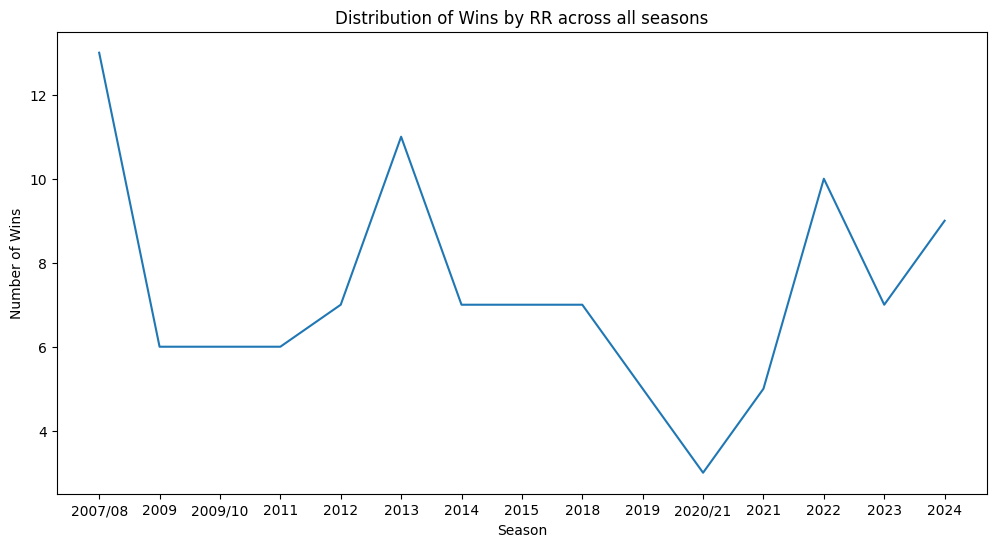

In [41]:
rr_performance = team_performance_overall[team_performance_overall['winner'] == 'Rajasthan Royals'][['winner','season', 'wins']]
plt.figure(figsize=(12,6))
plt.plot(rr_performance['season'],rr_performance['wins'])
plt.title("Distribution of Wins by RR across all seasons")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()

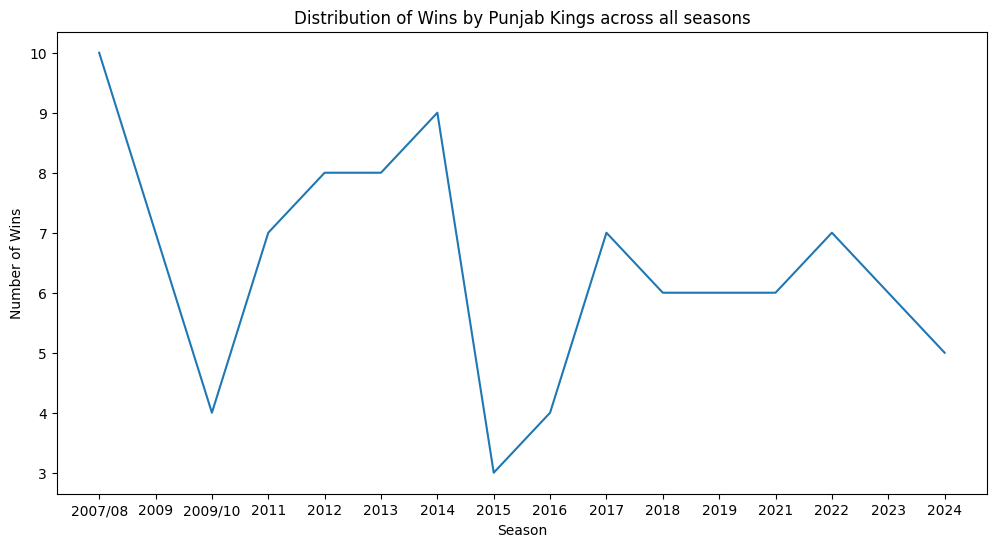

In [42]:
kx1p_performance = team_performance_overall[
    (team_performance_overall['winner'] == 'Kings XI Punjab') | 
    (team_performance_overall['winner'] == 'Punjab Kings')
][['winner','season', 'wins']]

plt.figure(figsize=(12,6))
plt.plot(kx1p_performance['season'], kx1p_performance['wins'])  # Added markers for clarity
plt.title("Distribution of Wins by Punjab Kings across all seasons")  # Fixed closing bracket issue
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()


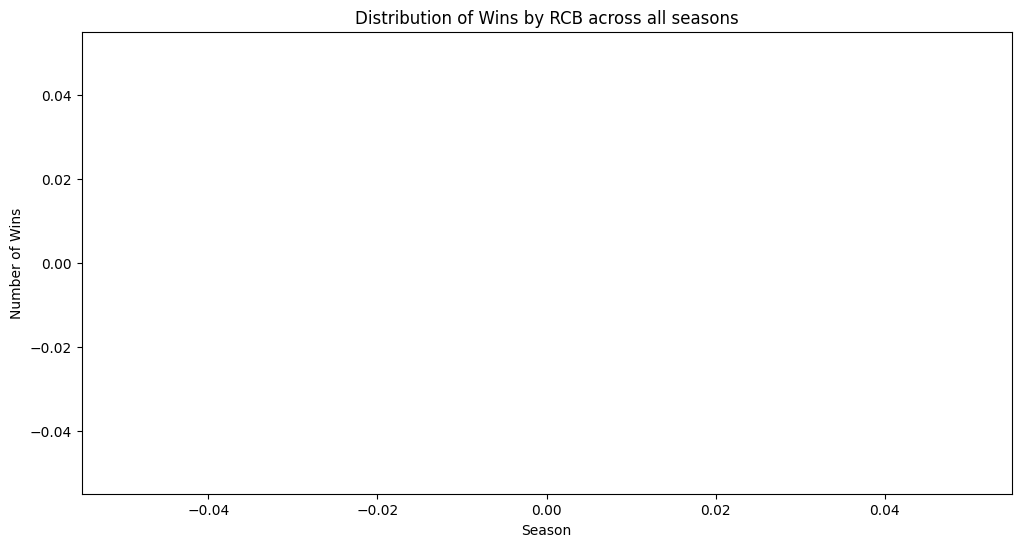

In [43]:
rcb_performance = team_performance_overall[
    (team_performance_overall['winner'] == 'Royal Challengers Bangalore')][['winner','season', 'wins']]

plt.figure(figsize=(12,6))
plt.plot(rcb_performance['season'], rcb_performance['wins'])  # Added markers for clarity
plt.title("Distribution of Wins by RCB across all seasons")  # Fixed closing bracket issue
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()


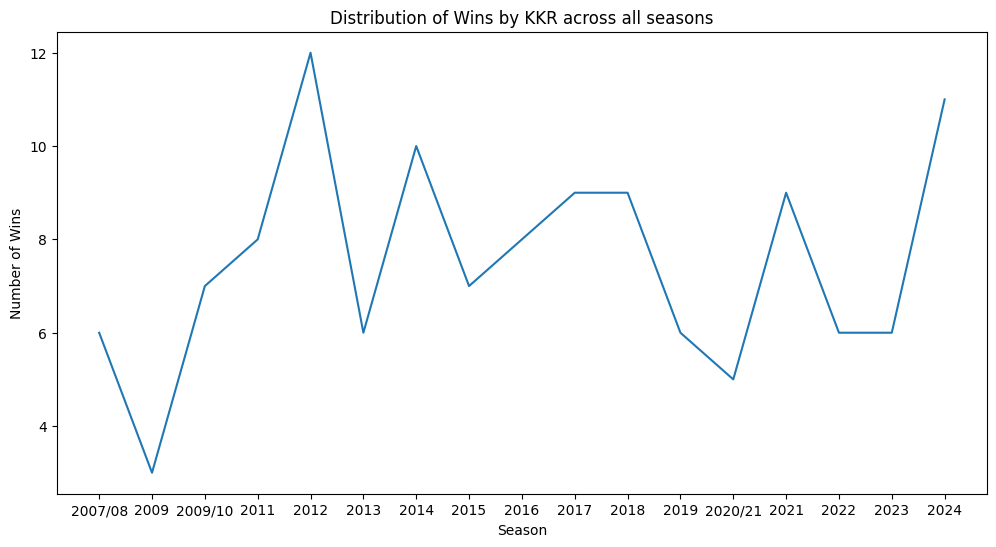

In [44]:
kkr_performance = team_performance_overall[
    (team_performance_overall['winner'] == 'Kolkata Knight Riders')][['winner','season', 'wins']]

plt.figure(figsize=(12,6))
plt.plot(kkr_performance['season'], kkr_performance['wins'])  # Added markers for clarity
plt.title("Distribution of Wins by KKR across all seasons")  # Fixed closing bracket issue
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()


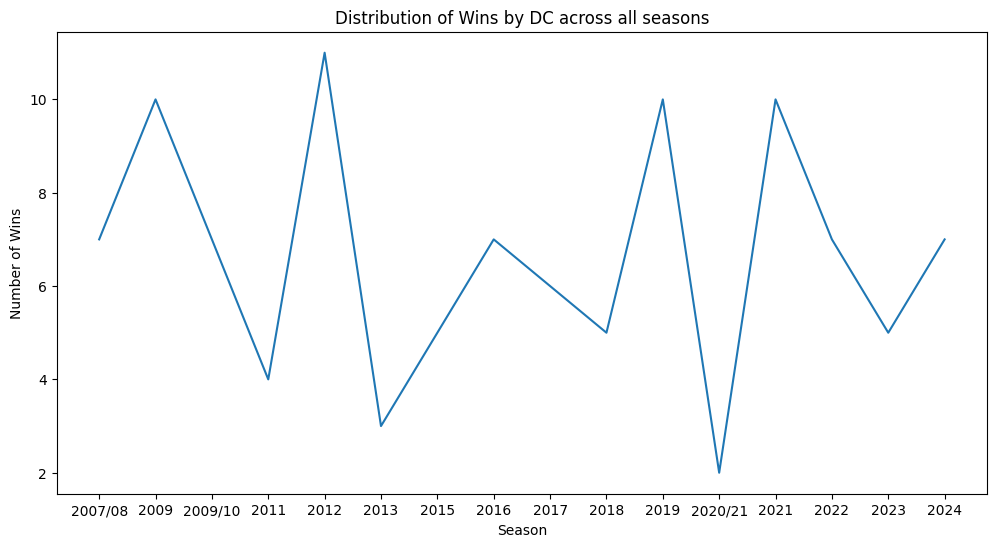

In [45]:
dc_performance = team_performance_overall[
    (team_performance_overall['winner'] == 'Delhi Daredevils') | (team_performance_overall['winner'] == 'Delhi Capitals')][['winner','season', 'wins']]

plt.figure(figsize=(12,6))
plt.plot(dc_performance['season'], dc_performance['wins'])  # Added markers for clarity
plt.title("Distribution of Wins by DC across all seasons")  # Fixed closing bracket issue
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()


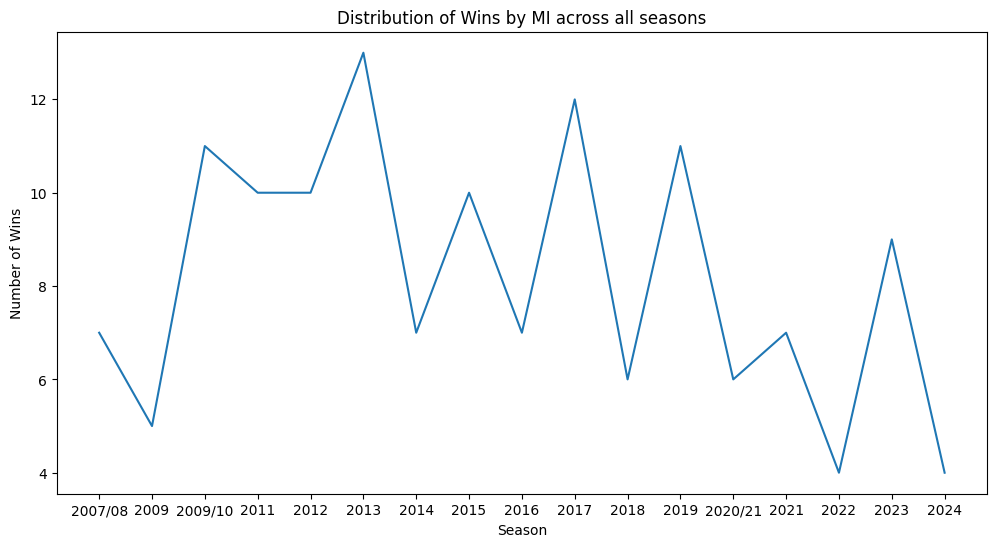

In [46]:
mi_performance = team_performance_overall[
    (team_performance_overall['winner'] == 'Mumbai Indians')][['winner','season', 'wins']]

plt.figure(figsize=(12,6))
plt.plot(mi_performance['season'], mi_performance['wins'])  # Added markers for clarity
plt.title("Distribution of Wins by MI across all seasons")  # Fixed closing bracket issue
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()


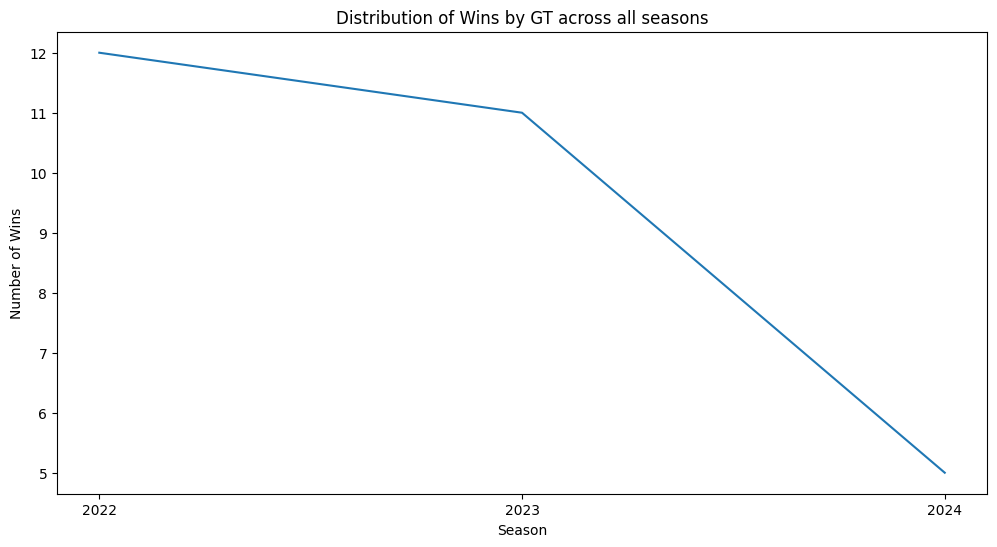

In [47]:
gt_performance = team_performance_overall[
    (team_performance_overall['winner'] == 'Gujarat Titans')][['winner','season', 'wins']]

plt.figure(figsize=(12,6))
plt.plot(gt_performance['season'], gt_performance['wins'])  # Added markers for clarity
plt.title("Distribution of Wins by GT across all seasons")  # Fixed closing bracket issue
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()


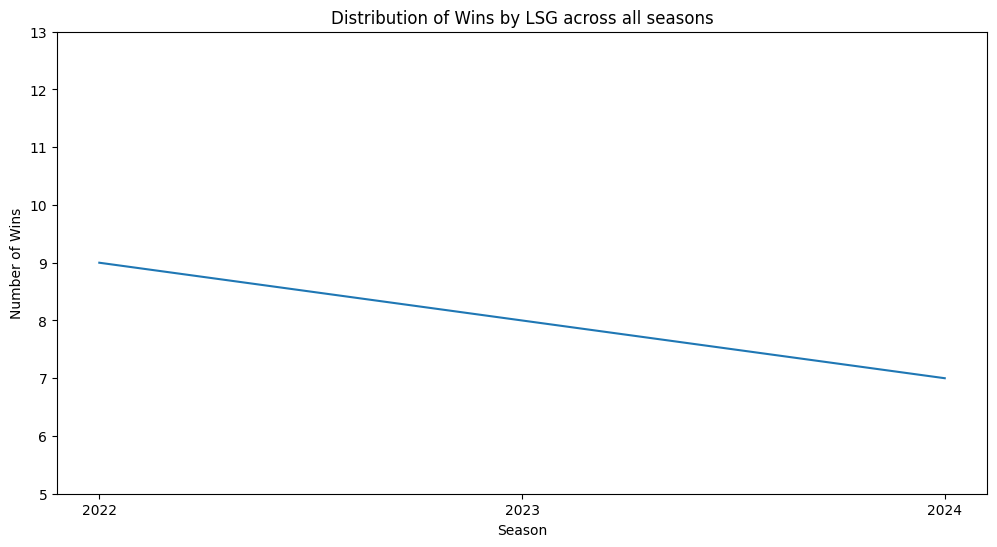

In [48]:
lsg_performance = team_performance_overall[
    (team_performance_overall['winner'] == 'Lucknow Super Giants')][['winner','season', 'wins']]

plt.figure(figsize=(12,6))
plt.plot(lsg_performance['season'], lsg_performance['wins'])  # Added markers for clarity
plt.title("Distribution of Wins by LSG across all seasons")  # Fixed closing bracket issue
plt.xlabel("Season")
plt.yticks(range(5,14,1))
plt.ylabel("Number of Wins")
plt.show()


In [49]:
teams = df['winner'].unique()
teams

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bengaluru', 'Rajasthan Royals', 'Punjab Kings',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

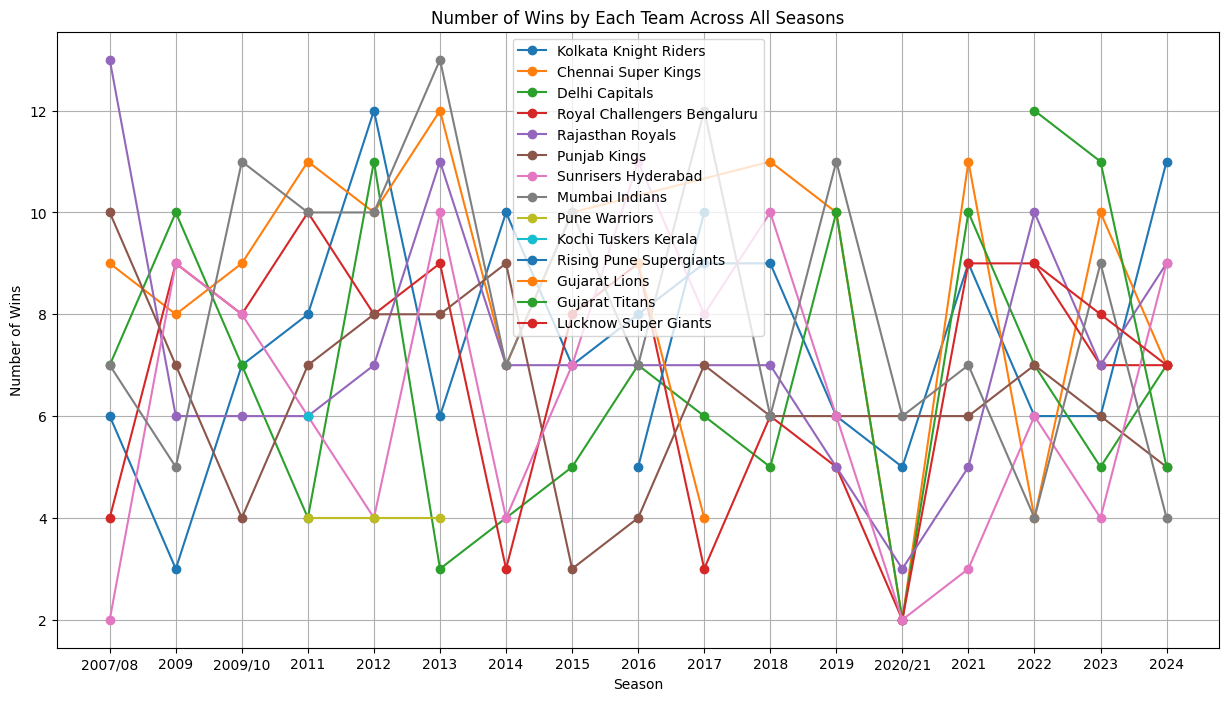

In [50]:
plt.figure(figsize=(15, 8))  # Adjusted size for better visibility

for team in teams:
    team_performance = team_performance_overall[
        team_performance_overall['winner'] == team
    ][['season', 'wins']]
    
    plt.plot(team_performance['season'], team_performance['wins'], marker='o', label=team)

plt.title("Number of Wins by Each Team Across All Seasons")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.legend()  # Show team labels
plt.grid(True)  # Improves readability
plt.show()


***Match Type Trends***

In [51]:
df.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss,Full
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss,Full


In [52]:
team_performance_overall = df.groupby(['season', 'winner']).size().reset_index(name='wins')


In [53]:
playoff_matches = df[df['match_type'] != "League"]

team_wins_in_playoffs = playoff_matches.groupby(['winner']).size()


team_playoff_counts = pd.concat([playoff_matches['team1'], playoff_matches['team2']]).value_counts()

team_playoff_counts


Chennai Super Kings            26
Mumbai Indians                 18
Sunrisers Hyderabad            18
Royal Challengers Bengaluru    16
Kolkata Knight Riders          15
Rajasthan Royals               11
Delhi Capitals                  9
Gujarat Titans                  5
Punjab Kings                    4
Gujarat Lions                   2
Rising Pune Supergiants         2
Lucknow Super Giants            2
Name: count, dtype: int64

In [54]:
team_wins_in_playoffs

winner
Chennai Super Kings            17
Delhi Capitals                  2
Gujarat Titans                  3
Kolkata Knight Riders          10
Mumbai Indians                 11
Punjab Kings                    1
Rajasthan Royals                5
Rising Pune Supergiants         1
Royal Challengers Bengaluru     6
Sunrisers Hyderabad             8
dtype: int64

In [55]:
win_percentage_in_playoffs = ( team_wins_in_playoffs / team_playoff_counts ) * 100
win_percentage_in_playoffs = win_percentage_in_playoffs.dropna()
win_percentage_in_playoffs

Chennai Super Kings            65.384615
Delhi Capitals                 22.222222
Gujarat Titans                 60.000000
Kolkata Knight Riders          66.666667
Mumbai Indians                 61.111111
Punjab Kings                   25.000000
Rajasthan Royals               45.454545
Rising Pune Supergiants        50.000000
Royal Challengers Bengaluru    37.500000
Sunrisers Hyderabad            44.444444
dtype: float64

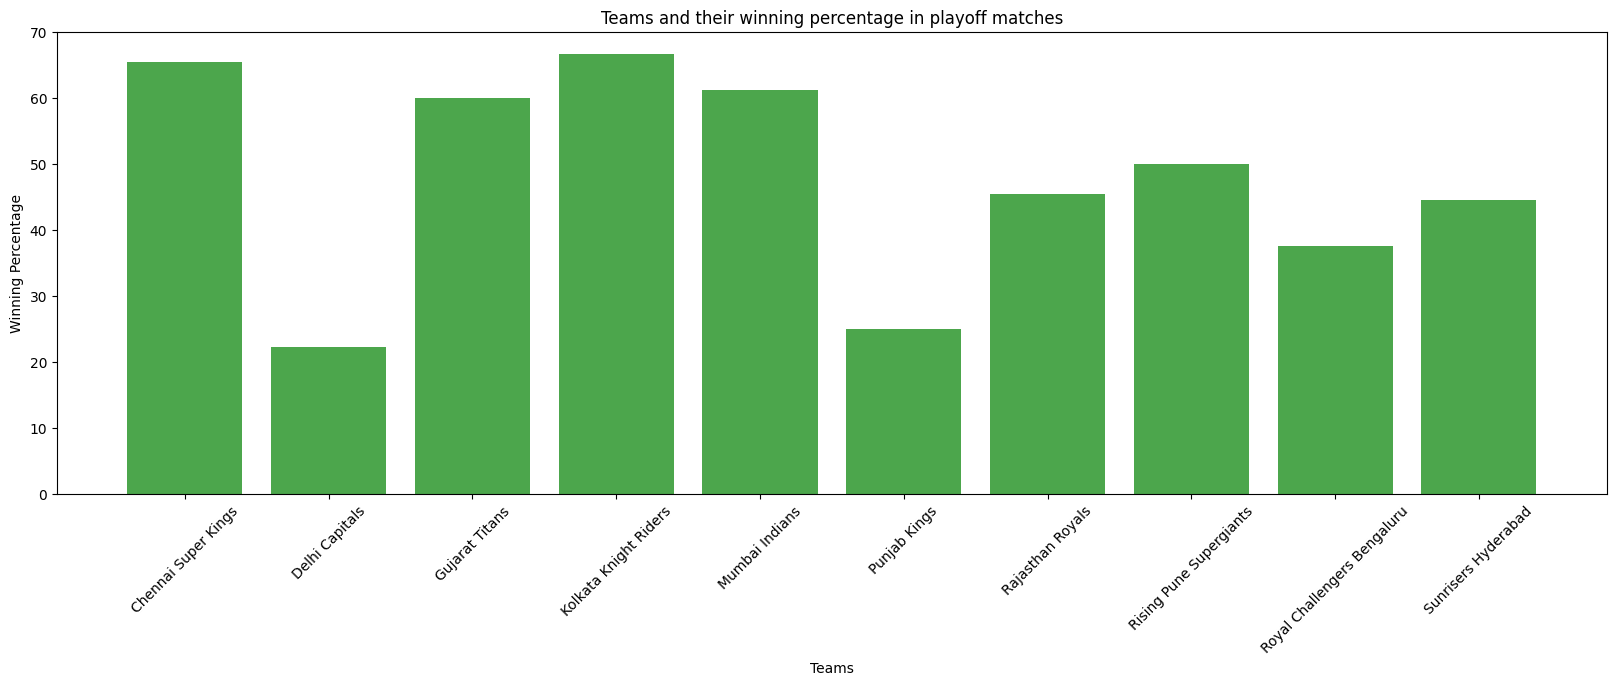

In [56]:
plt.figure(figsize = (20,6))
plt.bar(win_percentage_in_playoffs.index,win_percentage_in_playoffs.values,alpha = 0.7,color = "green")
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Winning Percentage")
plt.title("Teams and their winning percentage in playoff matches")
plt.show()

In [57]:
df.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss,Full
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss,Full


In [58]:
number_of_home_wins = df.groupby('winner').apply(lambda x: (x['team1'] == x['winner']).sum()).reset_index(name='home_wins')
number_of_home_wins


/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/4228954678.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  number_of_home_wins = df.groupby('winner').apply(lambda x: (x['team1'] == x['winner']).sum()).reset_index(name='home_wins')


,winner,home_wins
0,Chennai Super Kings,73
1,Delhi Capitals,54
2,Gujarat Lions,5
3,Gujarat Titans,11
4,Kochi Tuskers Kerala,3
5,Kolkata Knight Riders,63
6,Lucknow Super Giants,16
7,Mumbai Indians,68
8,Pune Warriors,6
9,Punjab Kings,50


In [59]:
number_of_home_games_played = df.groupby('team1').size().reset_index(name='Number Of Home Matches Played')
number_of_home_games_played

,team1,Number Of Home Matches Played
0,Chennai Super Kings,124
1,Delhi Capitals,114
2,Gujarat Lions,16
3,Gujarat Titans,21
4,Kochi Tuskers Kerala,7
5,Kolkata Knight Riders,116
6,Lucknow Super Giants,22
7,Mumbai Indians,118
8,Pune Warriors,23
9,Punjab Kings,117


In [60]:
percentage_of_home_wins = number_of_home_wins['home_wins'] / number_of_home_games_played['Number Of Home Matches Played'] * 100
percentage_of_home_wins

0     58.870968
1     47.368421
2     31.250000
3     52.380952
4     42.857143
5     54.310345
6     72.727273
7     57.627119
8     26.086957
9     42.735043
10    56.250000
11    50.000000
12    49.242424
13    44.537815
dtype: float64

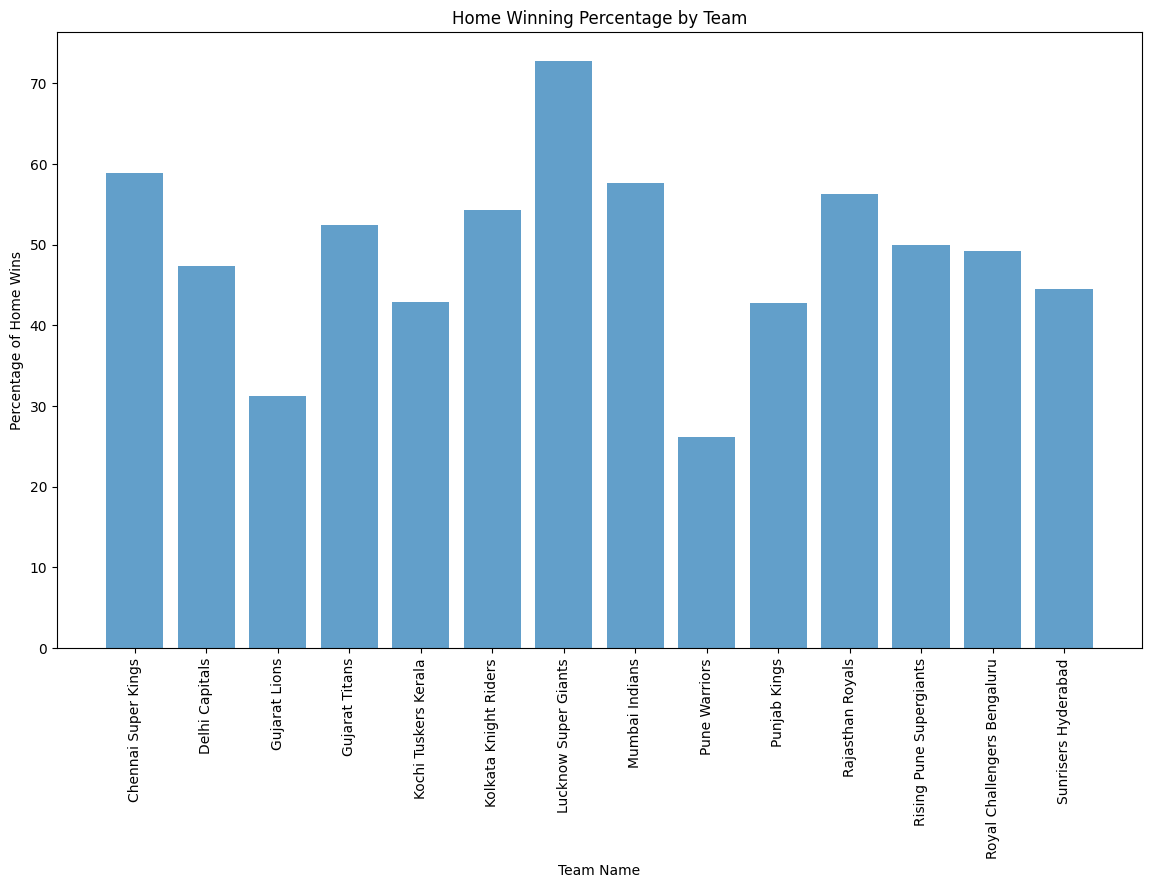

In [61]:
plt.figure(figsize=(14,8))
plt.bar(number_of_home_games_played['team1'],percentage_of_home_wins,alpha = 0.7)
plt.xlabel("Team Name")
plt.ylabel("Percentage of Home Wins")
plt.title("Home Winning Percentage by Team")
plt.xticks(rotation = 90)
plt.show()

In [62]:
number_of_away_games_played = df.groupby('team2').size().reset_index(name='Number Of Away Matches Played')
number_of_away_games_played

,team2,Number Of Away Matches Played
0,Chennai Super Kings,100
1,Delhi Capitals,120
2,Gujarat Lions,14
3,Gujarat Titans,24
4,Kochi Tuskers Kerala,7
5,Kolkata Knight Riders,127
6,Lucknow Super Giants,21
7,Mumbai Indians,131
8,Pune Warriors,22
9,Punjab Kings,116


In [63]:
number_of_away_wins = df.groupby('winner').apply(lambda x: (x['team2'] == x['winner']).sum()).reset_index(name='away_wins')
number_of_away_wins


/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/3370745464.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  number_of_away_wins = df.groupby('winner').apply(lambda x: (x['team2'] == x['winner']).sum()).reset_index(name='away_wins')


,winner,away_wins
0,Chennai Super Kings,58
1,Delhi Capitals,52
2,Gujarat Lions,8
3,Gujarat Titans,17
4,Kochi Tuskers Kerala,3
5,Kolkata Knight Riders,65
6,Lucknow Super Giants,8
7,Mumbai Indians,71
8,Pune Warriors,6
9,Punjab Kings,53


In [64]:
percentage_of_away_wins = number_of_away_wins['away_wins'] / number_of_away_games_played['Number Of Away Matches Played'] * 100
percentage_of_away_wins

0     58.000000
1     43.333333
2     57.142857
3     70.833333
4     42.857143
5     51.181102
6     38.095238
7     54.198473
8     27.272727
9     45.689655
10    49.107143
11    50.000000
12    48.113208
13    45.528455
dtype: float64

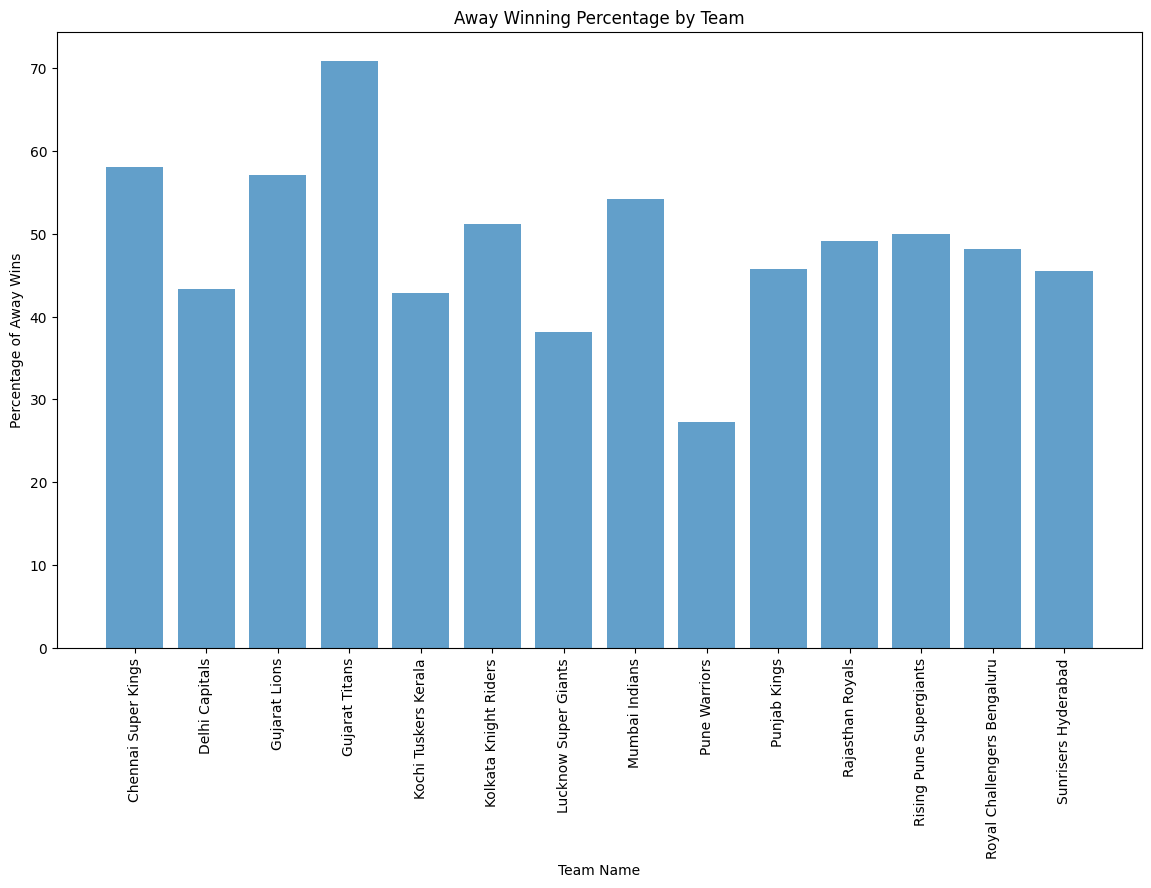

In [65]:
plt.figure(figsize=(14,8))
plt.bar(number_of_away_games_played['team2'],percentage_of_away_wins,alpha = 0.7)
plt.xlabel("Team Name")
plt.ylabel("Percentage of Away Wins")
plt.title("Away Winning Percentage by Team")
plt.xticks(rotation = 90)
plt.show()

In [66]:
df.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss,Full
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss,Full


In [67]:
total_matches_played = pd.concat([df['team1'],df['team2']]).value_counts()
total_matches_played

Mumbai Indians                 249
Kolkata Knight Riders          243
Sunrisers Hyderabad            242
Royal Challengers Bengaluru    238
Delhi Capitals                 234
Punjab Kings                   233
Chennai Super Kings            224
Rajasthan Royals               208
Pune Warriors                   45
Gujarat Titans                  45
Lucknow Super Giants            43
Gujarat Lions                   30
Rising Pune Supergiants         30
Kochi Tuskers Kerala            14
Name: count, dtype: int64

In [68]:
total_matches_won = df.groupby(['winner']).size()
total_matches_won

winner
Chennai Super Kings            131
Delhi Capitals                 106
Gujarat Lions                   13
Gujarat Titans                  28
Kochi Tuskers Kerala             6
Kolkata Knight Riders          128
Lucknow Super Giants            24
Mumbai Indians                 139
Pune Warriors                   12
Punjab Kings                   103
Rajasthan Royals               109
Rising Pune Supergiants         15
Royal Challengers Bengaluru    116
Sunrisers Hyderabad            109
dtype: int64

In [69]:
percentage_of_matches_won = (total_matches_won / total_matches_played) * 100
percentage_of_matches_won

Chennai Super Kings            58.482143
Delhi Capitals                 45.299145
Gujarat Lions                  43.333333
Gujarat Titans                 62.222222
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          52.674897
Lucknow Super Giants           55.813953
Mumbai Indians                 55.823293
Pune Warriors                  26.666667
Punjab Kings                   44.206009
Rajasthan Royals               52.403846
Rising Pune Supergiants        50.000000
Royal Challengers Bengaluru    48.739496
Sunrisers Hyderabad            45.041322
dtype: float64

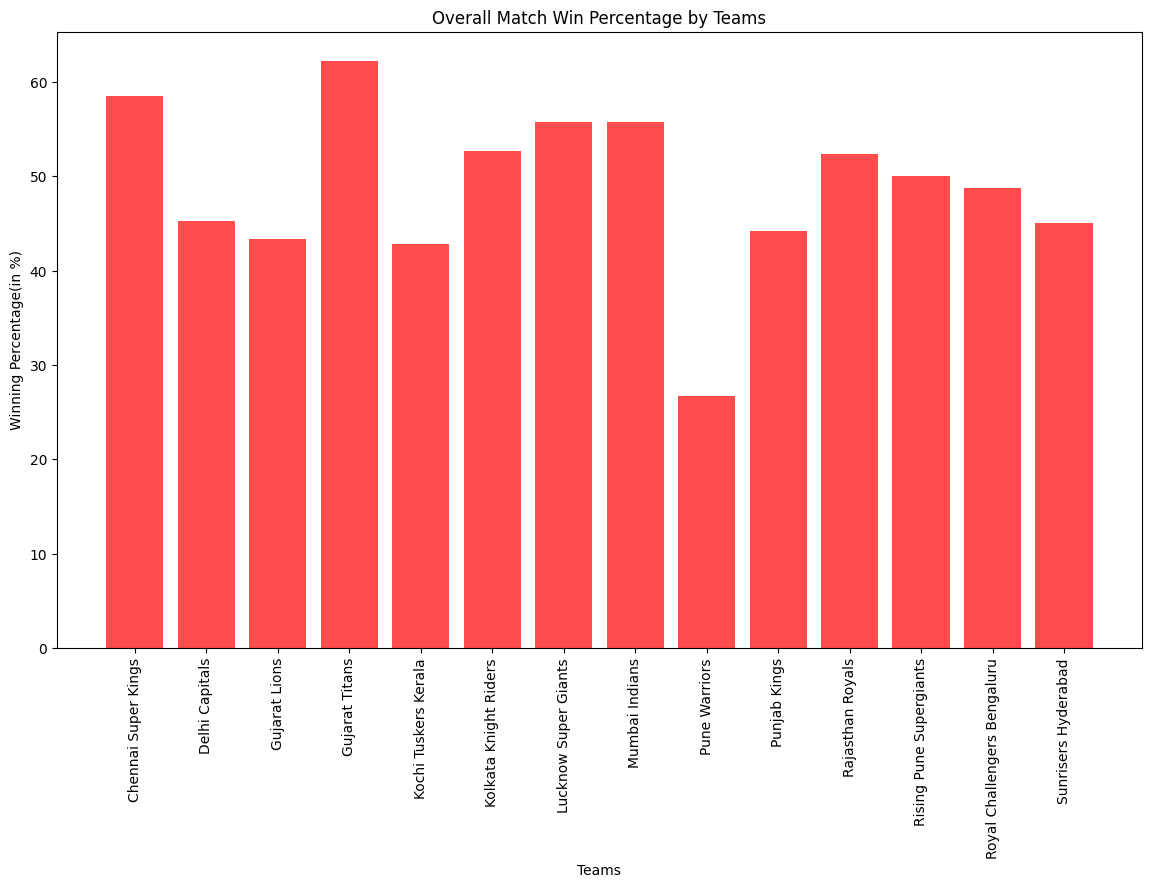

In [70]:
plt.figure(figsize=(14,8))
plt.bar(percentage_of_matches_won.index,percentage_of_matches_won.values,alpha = 0.7,color = "red")
plt.ylabel("Winning Percentage(in %)")
plt.xlabel("Teams")
plt.title("Overall Match Win Percentage by Teams")
plt.xticks(rotation = 90)
plt.show()

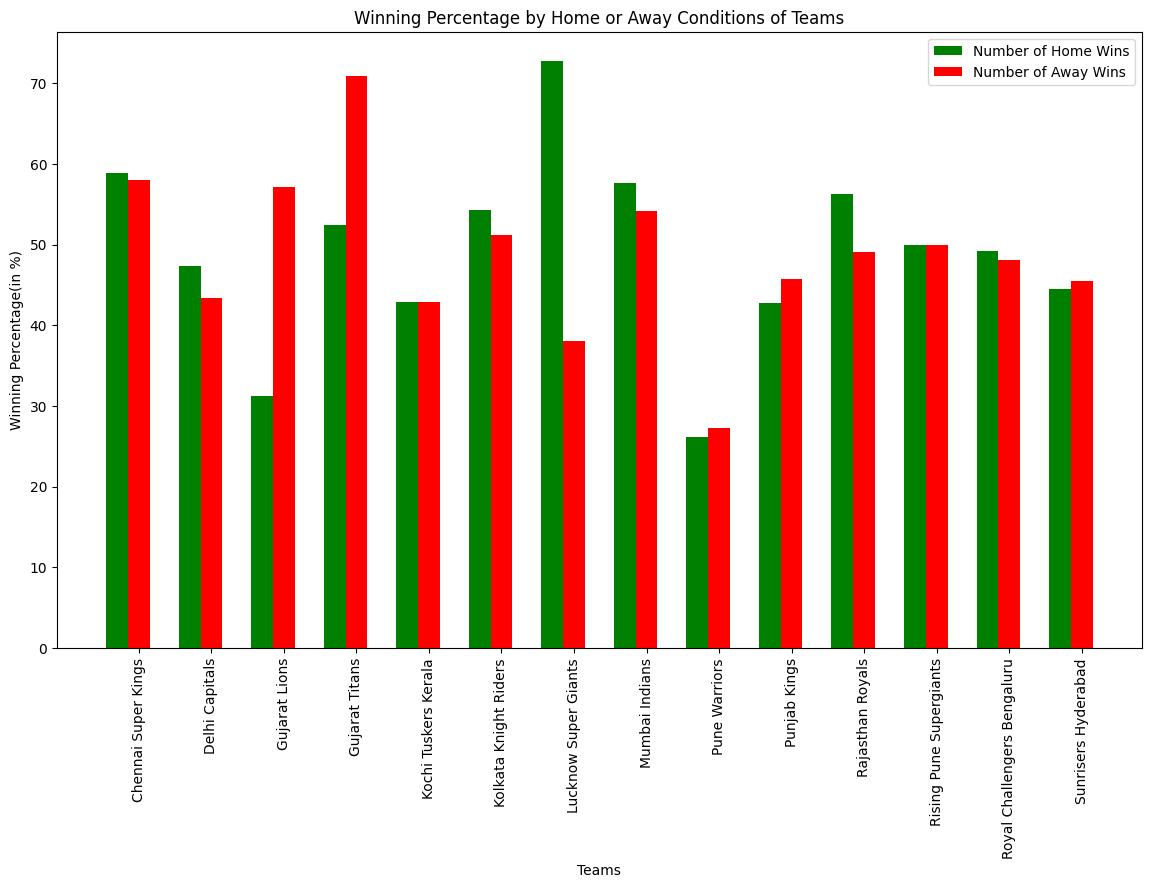

In [71]:
plt.figure(figsize=(14,8))
teams = number_of_away_games_played['team2']
x = np.arange(len(teams))
width = 0.3
plt.bar(x - 0.3,percentage_of_home_wins,width,color="green")
plt.bar(x,percentage_of_away_wins,width,color="red")
plt.xticks(x,teams,rotation = 90)
plt.legend(["Number of Home Wins","Number of Away Wins"])
plt.xlabel("Teams")
plt.ylabel("Winning Percentage(in %)")
plt.title("Winning Percentage by Home or Away Conditions of Teams")
plt.show()

In [72]:
df.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss,Full
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss,Full


In [73]:
df_result_as_runs = df[df['result'] == "runs"]
df_result_as_wickets = df[df['result'] == 'wickets']
df_result_as_tie = df[df['result'] == 'tie']

In [74]:
percentage_of_result_as_runs = (df_result_as_runs.shape[0]/df.shape[0]) * 100
percentage_of_result_as_wickets = (df_result_as_wickets.shape[0]/df.shape[0]) * 100
percentage_of_result_as_tie = (df_result_as_tie.shape[0] / df.shape[0]) * 100
result_type_percentage = pd.DataFrame({
    'Result Type': ['Wins by Runs', 'Wins by Wickets', 'Tie'],
    'Percentage': [percentage_of_result_as_runs, percentage_of_result_as_wickets, percentage_of_result_as_tie]
})
result_type_percentage

,Result Type,Percentage
0,Wins by Runs,45.620789
1,Wins by Wickets,53.320500
2,Tie,1.058710


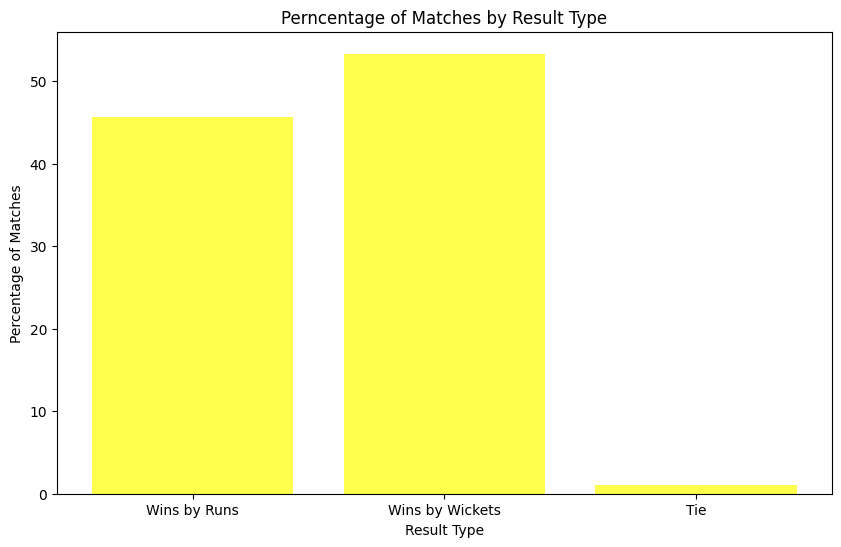

In [75]:
plt.figure(figsize = (10,6))
plt.bar(result_type_percentage['Result Type'],result_type_percentage['Percentage'],color = "Yellow",alpha = 0.7)
plt.xlabel("Result Type")
plt.ylabel("Percentage of Matches")
plt.title("Perncentage of Matches by Result Type")
plt.show()

In [76]:
df_result_as_runs.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full
7,335989,2007/08,Chennai,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6,209,20.0,No,Normal,DJ Harper,GA Pratapkumar,2008,4,23,Win,Loss,Full
9,335991,2007/08,Chandigarh,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Mumbai Indians,Mumbai Indians,field,Punjab Kings,runs,66,183,20.0,No,Normal,Aleem Dar,AM Saheba,2008,4,25,Win,Loss,Full
14,335996,2007/08,Bangalore,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13,179,20.0,No,Normal,BR Doctrove,RB Tiffin,2008,4,28,Loss,Win,Full


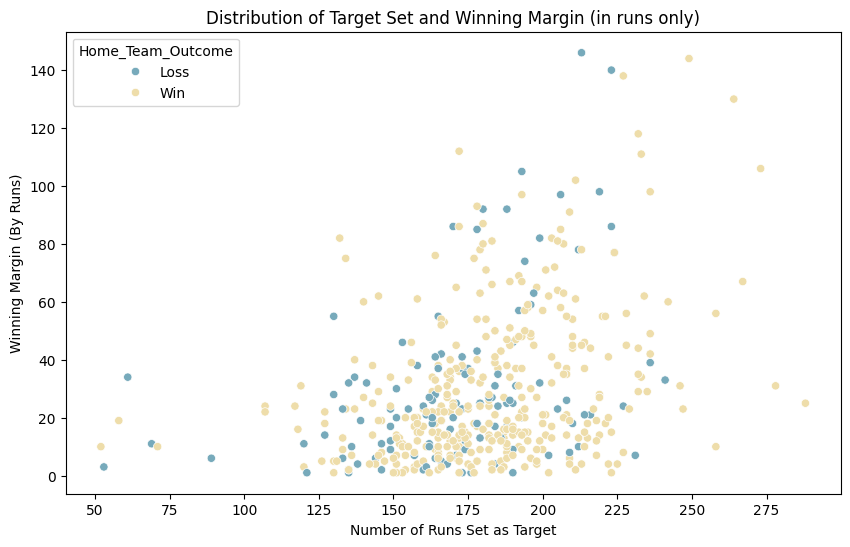

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "target_runs",y = "result_margin",data = df_result_as_runs,hue = "Home_Team_Outcome",palette = "blend:#7AB,#EDA")
plt.xlabel("Number of Runs Set as Target")
plt.ylabel("Winning Margin (By Runs)")
plt.title("Distribution of Target Set and Winning Margin (in runs only)")
plt.xticks(range(50,300,25))
plt.show()

In [78]:
df_result_as_wickets.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss,Full
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss,Full
5,335987,2007/08,Jaipur,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Punjab Kings,Punjab Kings,bat,Rajasthan Royals,wickets,6,167,20.0,No,Normal,Aleem Dar,RB Tiffin,2008,4,21,Win,Loss,Full
6,335988,2007/08,Hyderabad,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,Delhi Capitals,wickets,9,143,20.0,No,Normal,IL Howell,AM Saheba,2008,4,22,Loss,Win,Full


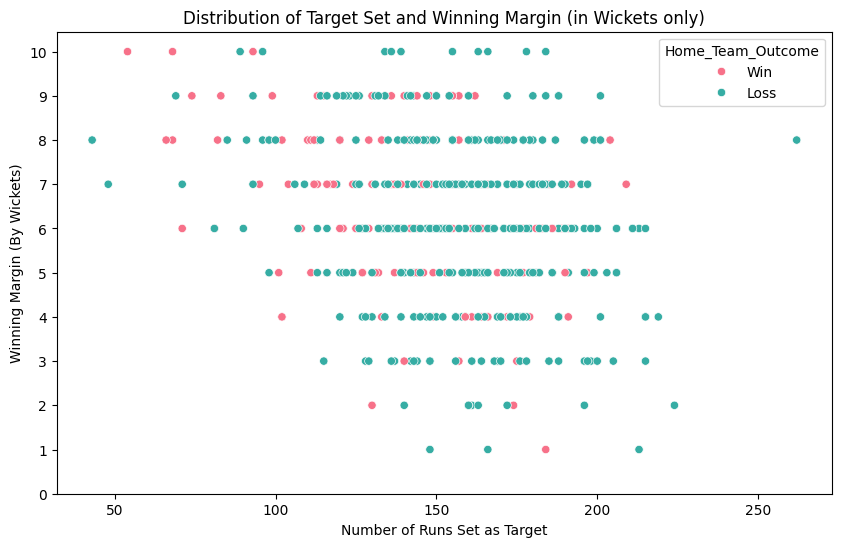

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "target_runs",y = "result_margin",data = df_result_as_wickets,hue = "Home_Team_Outcome",palette = "husl")
plt.xlabel("Number of Runs Set as Target")
plt.ylabel("Winning Margin (By Wickets)")
plt.title("Distribution of Target Set and Winning Margin (in Wickets only)")
plt.yticks(range(0,11,1))
plt.show()

In [80]:
df_match_in_mumbai = df[df['city'] == "Mumbai"]

In [81]:
df_match_in_mumbai = df[df['city'] == "Mumbai"]

In [82]:
df_match_in_mumbai['venue'].value_counts()

venue
Wankhede Stadium                      73
Wankhede Stadium, Mumbai              45
Dr DY Patil Sports Academy            17
Brabourne Stadium, Mumbai             17
Dr DY Patil Sports Academy, Mumbai    11
Brabourne Stadium                     10
Name: count, dtype: int64

In [83]:
df_match_in_mumbai = df_match_in_mumbai.replace("Wankhede Stadium, Mumbai","Wankhede Stadium")
df_match_in_mumbai = df_match_in_mumbai.replace("Dr DY Patil Sports Academy, Mumbai","Dr DY Patil Sports Academy")
df_match_in_mumbai = df_match_in_mumbai.replace("Brabourne Stadium, Mumbai","Brabourne Stadium")


In [84]:
df_match_in_mumbai['venue'].value_counts()

venue
Wankhede Stadium              118
Dr DY Patil Sports Academy     28
Brabourne Stadium              27
Name: count, dtype: int64

In [85]:
df_match_in_mumbai.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full
12,335994,2007/08,Mumbai,League,AC Gilchrist,Dr DY Patil Sports Academy,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,10,155,20.0,No,Normal,Asad Rauf,SL Shastri,2008,4,27,Loss,Win,Full
22,336004,2007/08,Mumbai,League,SM Pollock,Dr DY Patil Sports Academy,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,29,163,20.0,No,Normal,IL Howell,RE Koertzen,2008,5,4,Win,Loss,Full
26,336008,2007/08,Mumbai,League,A Nehra,Dr DY Patil Sports Academy,Mumbai Indians,Rajasthan Royals,Mumbai Indians,field,Mumbai Indians,wickets,7,104,20.0,No,Normal,DJ Harper,RE Koertzen,2008,5,7,Win,Loss,Full
35,336018,2007/08,Mumbai,League,ST Jayasuriya,Wankhede Stadium,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,wickets,9,157,20.0,No,Normal,BR Doctrove,AM Saheba,2008,5,14,Win,Loss,Full


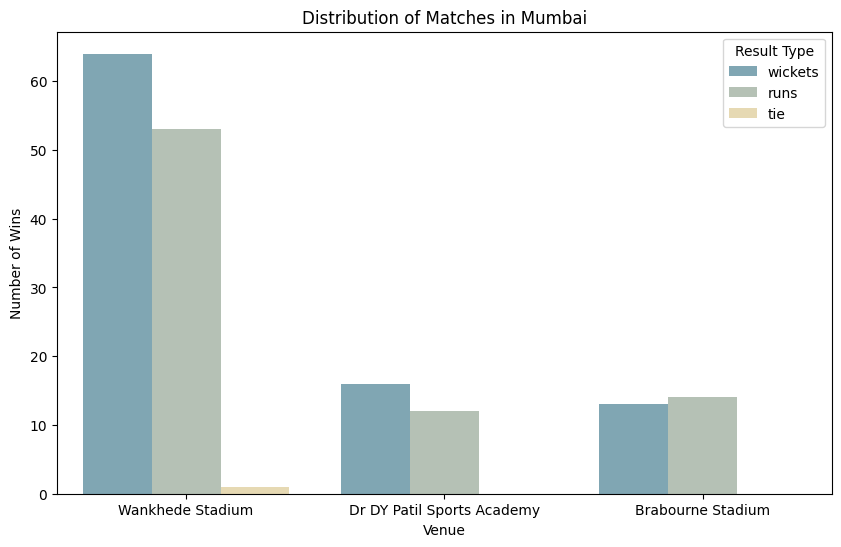

In [86]:
plt.figure(figsize = (10,6))
sns.countplot(x = "venue",data = df_match_in_mumbai,hue = "result",palette = "blend:#7AB,#EDA")
plt.xlabel("Venue")
plt.ylabel("Number of Wins")
plt.title("Distribution of Matches in Mumbai")
plt.legend(title = "Result Type")
plt.show()

In [87]:
df_match_in_mumbai.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full
12,335994,2007/08,Mumbai,League,AC Gilchrist,Dr DY Patil Sports Academy,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,10,155,20.0,No,Normal,Asad Rauf,SL Shastri,2008,4,27,Loss,Win,Full
22,336004,2007/08,Mumbai,League,SM Pollock,Dr DY Patil Sports Academy,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,29,163,20.0,No,Normal,IL Howell,RE Koertzen,2008,5,4,Win,Loss,Full
26,336008,2007/08,Mumbai,League,A Nehra,Dr DY Patil Sports Academy,Mumbai Indians,Rajasthan Royals,Mumbai Indians,field,Mumbai Indians,wickets,7,104,20.0,No,Normal,DJ Harper,RE Koertzen,2008,5,7,Win,Loss,Full
35,336018,2007/08,Mumbai,League,ST Jayasuriya,Wankhede Stadium,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,wickets,9,157,20.0,No,Normal,BR Doctrove,AM Saheba,2008,5,14,Win,Loss,Full


In [88]:
df_match_in_mumbai.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full
12,335994,2007/08,Mumbai,League,AC Gilchrist,Dr DY Patil Sports Academy,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,10,155,20.0,No,Normal,Asad Rauf,SL Shastri,2008,4,27,Loss,Win,Full
22,336004,2007/08,Mumbai,League,SM Pollock,Dr DY Patil Sports Academy,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,29,163,20.0,No,Normal,IL Howell,RE Koertzen,2008,5,4,Win,Loss,Full
26,336008,2007/08,Mumbai,League,A Nehra,Dr DY Patil Sports Academy,Mumbai Indians,Rajasthan Royals,Mumbai Indians,field,Mumbai Indians,wickets,7,104,20.0,No,Normal,DJ Harper,RE Koertzen,2008,5,7,Win,Loss,Full
35,336018,2007/08,Mumbai,League,ST Jayasuriya,Wankhede Stadium,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,wickets,9,157,20.0,No,Normal,BR Doctrove,AM Saheba,2008,5,14,Win,Loss,Full


# 2) Toss Winner and Toss Decision Analysis
**Assess the impact of winning the toss and the decision to bat or bowl first on match outcomes.**

In [89]:
number_of_times_toss_won_won_match = df_match_in_mumbai.groupby(['venue']).apply(lambda x : (x['toss_winner'] == x['winner']).sum()).reset_index(name = 'Number of Wins')
number_of_times_toss_won_lost_match = df_match_in_mumbai.groupby(['venue']).apply(lambda x : (x['toss_winner'] != x['winner']).sum()).reset_index(name = 'Number of Wins')
number_of_times_toss_won_won_match

/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/2035409220.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  number_of_times_toss_won_won_match = df_match_in_mumbai.groupby(['venue']).apply(lambda x : (x['toss_winner'] == x['winner']).sum()).reset_index(name = 'Number of Wins')
/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/2035409220.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this

,venue,Number of Wins
0,Brabourne Stadium,14
1,Dr DY Patil Sports Academy,15
2,Wankhede Stadium,62


In [90]:
toss_match_results = pd.merge(number_of_times_toss_won_won_match,number_of_times_toss_won_lost_match,on = 'venue')

In [91]:
toss_match_results = pd.merge(number_of_times_toss_won_won_match,number_of_times_toss_won_lost_match,on = 'venue')

In [92]:
toss_match_results.rename(columns = {'Number of Wins_x' : 'toss_wins_match_wins'},inplace = True)
toss_match_results.rename(columns = {'Number of Wins_y' : 'toss_wins_match_loses'},inplace = True)
toss_match_results

,venue,toss_wins_match_wins,toss_wins_match_loses
0,Brabourne Stadium,14,13
1,Dr DY Patil Sports Academy,15,13
2,Wankhede Stadium,62,56


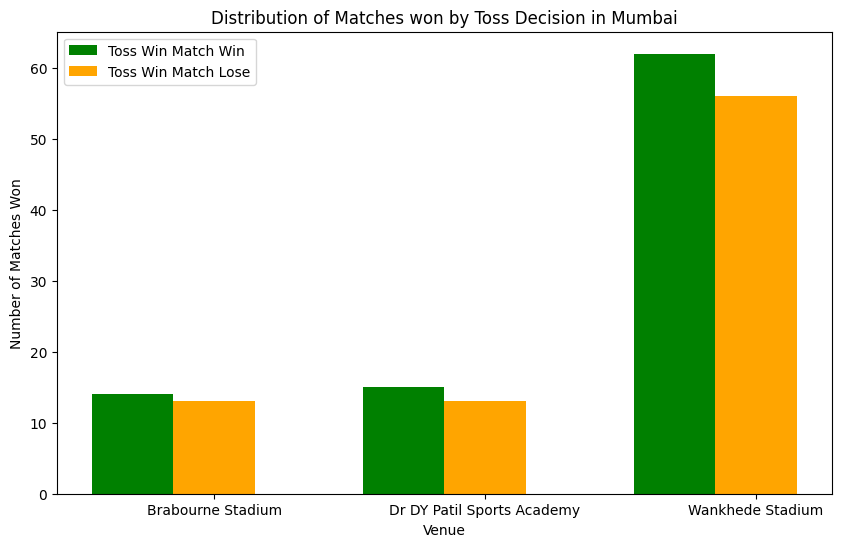

In [93]:
plt.figure(figsize = (10,6))
x = np.arange(len(toss_match_results))
width = 0.3
plt.bar(x - 0.3,toss_match_results['toss_wins_match_wins'],width,color = "green")
plt.bar(x,toss_match_results['toss_wins_match_loses'],width,color = "orange")
plt.xlabel("Venue")
plt.xticks(x,toss_match_results['venue'])
plt.legend(["Toss Win Match Win","Toss Win Match Lose"])
plt.title("Distribution of Matches won by Toss Decision in Mumbai")
plt.ylabel("Number of Matches Won")
plt.show()

In [94]:
df.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss,Full
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss,Full


In [95]:
df['TossWin_MatchWin'] = np.where(df['toss_winner'] == df['winner'],"Yes","No")
df['Match_Type'] = np.where(df['match_type'] == "League","League","Playoffs")

In [96]:
df.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,TossWin_MatchWin,Match_Type
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full,No,League
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full,Yes,League
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss,Full,No,League
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full,No,League
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss,Full,No,League


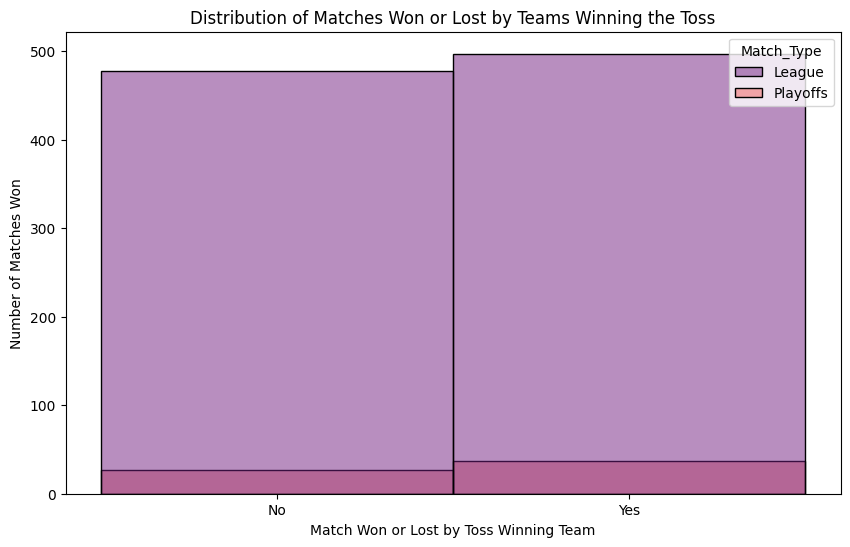

In [97]:
plt.figure(figsize = (10,6))
sns.histplot(x = "TossWin_MatchWin",data = df,hue = "Match_Type",palette = "magma")
plt.ylabel("Number of Matches Won")
plt.xlabel("Match Won or Lost by Toss Winning Team")
plt.title("Distribution of Matches Won or Lost by Teams Winning the Toss")
plt.show()

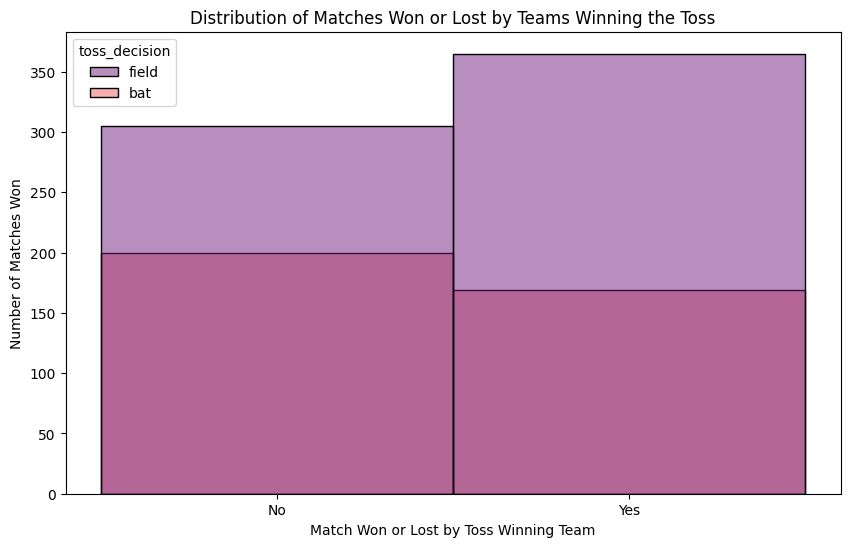

In [98]:
plt.figure(figsize = (10,6))
sns.histplot(x = "TossWin_MatchWin",data = df,hue = "toss_decision",palette = "magma")
plt.ylabel("Number of Matches Won")
plt.xlabel("Match Won or Lost by Toss Winning Team")
plt.title("Distribution of Matches Won or Lost by Teams Winning the Toss")
plt.show()

In [99]:
df.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,TossWin_MatchWin,Match_Type
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full,No,League
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full,Yes,League
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss,Full,No,League
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full,No,League
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss,Full,No,League


In [100]:
toss_dependence_by_team = df.groupby(['winner']).apply(lambda x : (x['toss_winner'] == x['winner']).sum()).reset_index(name = "Number of Matches Won")
toss_independence_by_team = df.groupby(['winner']).apply(lambda x : (x['toss_winner'] != x['winner']).sum()).reset_index(name = "Number of Matches Won")

/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/1159019077.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  toss_dependence_by_team = df.groupby(['winner']).apply(lambda x : (x['toss_winner'] == x['winner']).sum()).reset_index(name = "Number of Matches Won")
/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/1159019077.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  toss_in

In [101]:
toss_dependence_by_team

,winner,Number of Matches Won
0,Chennai Super Kings,73
1,Delhi Capitals,60
2,Gujarat Lions,10
3,Gujarat Titans,14
4,Kochi Tuskers Kerala,4
5,Kolkata Knight Riders,68
6,Lucknow Super Giants,10
7,Mumbai Indians,75
8,Pune Warriors,3
9,Punjab Kings,42


In [102]:
toss_independence_by_team

,winner,Number of Matches Won
0,Chennai Super Kings,58
1,Delhi Capitals,46
2,Gujarat Lions,3
3,Gujarat Titans,14
4,Kochi Tuskers Kerala,2
5,Kolkata Knight Riders,60
6,Lucknow Super Giants,14
7,Mumbai Indians,64
8,Pune Warriors,9
9,Punjab Kings,61


In [103]:
toss_dependency = pd.merge(toss_dependence_by_team,toss_independence_by_team,on = "winner")
toss_dependency

,winner,Number of Matches Won_x,Number of Matches Won_y
0,Chennai Super Kings,73,58
1,Delhi Capitals,60,46
2,Gujarat Lions,10,3
3,Gujarat Titans,14,14
4,Kochi Tuskers Kerala,4,2
5,Kolkata Knight Riders,68,60
6,Lucknow Super Giants,10,14
7,Mumbai Indians,75,64
8,Pune Warriors,3,9
9,Punjab Kings,42,61


In [104]:
toss_dependency.rename(columns = {'winner':'Team','Number of Matches Won_x':'Number of Matches Won with Toss Dependency','Number of Matches Won_y':'Number of Matches Won without Toss Dependency'},inplace=True)

In [105]:
toss_dependency

,Team,Number of Matches Won with Toss Dependency,Number of Matches Won without Toss Dependency
0,Chennai Super Kings,73,58
1,Delhi Capitals,60,46
2,Gujarat Lions,10,3
3,Gujarat Titans,14,14
4,Kochi Tuskers Kerala,4,2
5,Kolkata Knight Riders,68,60
6,Lucknow Super Giants,10,14
7,Mumbai Indians,75,64
8,Pune Warriors,3,9
9,Punjab Kings,42,61


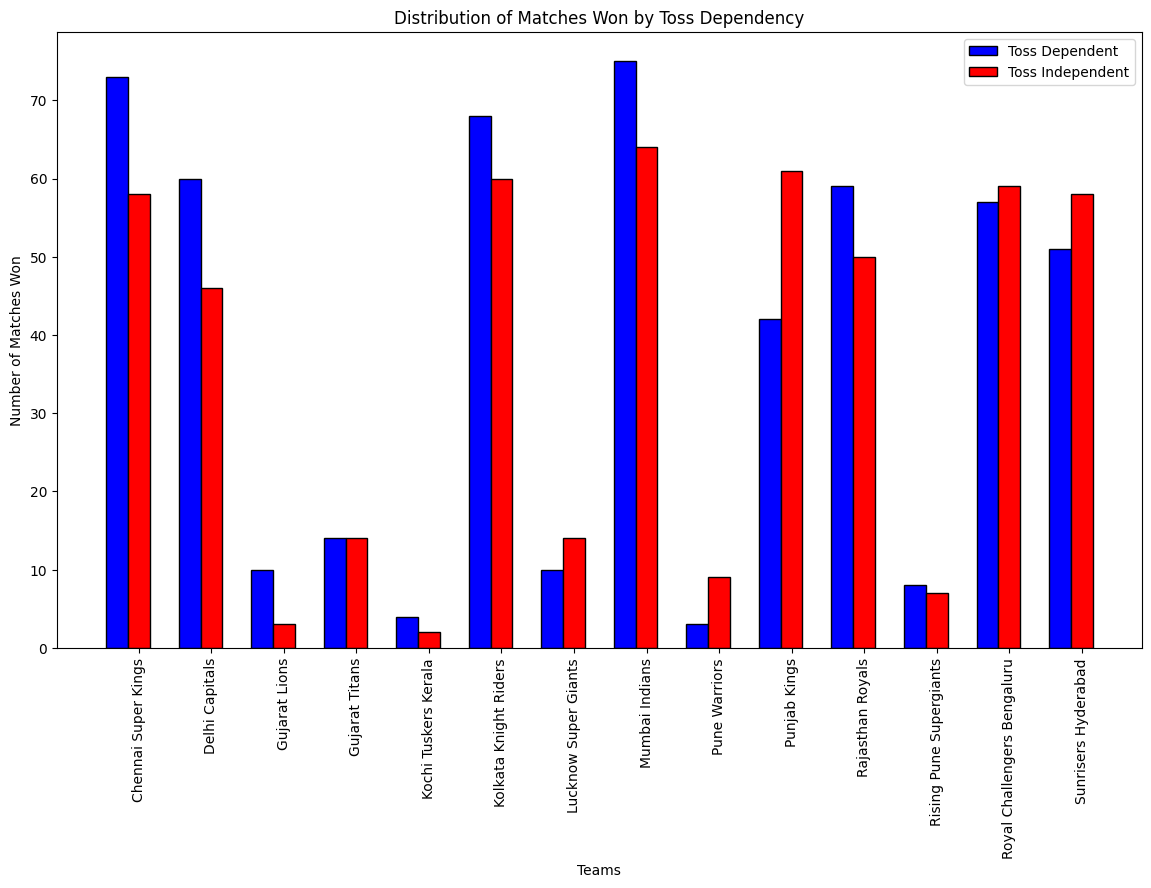

In [106]:
plt.figure(figsize = (14,8))
x = np.arange(len(toss_dependency))
width = 0.3
plt.bar(x - 0.3,toss_dependency['Number of Matches Won with Toss Dependency'],width,color="blue",edgecolor = "black")
plt.bar(x,toss_dependency['Number of Matches Won without Toss Dependency'],width,color="red",edgecolor = "black")
plt.xticks(x,toss_dependency['Team'],rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Number of Matches Won")
plt.title("Distribution of Matches Won by Toss Dependency")
plt.legend(["Toss Dependent","Toss Independent"])
plt.show()

# Match Outcomes and Margin Analysis

***Analyze match outcomes and the margin by which teams win or lose.***

In [108]:
df_result_as_runs.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full
7,335989,2007/08,Chennai,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6,209,20.0,No,Normal,DJ Harper,GA Pratapkumar,2008,4,23,Win,Loss,Full
9,335991,2007/08,Chandigarh,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Mumbai Indians,Mumbai Indians,field,Punjab Kings,runs,66,183,20.0,No,Normal,Aleem Dar,AM Saheba,2008,4,25,Win,Loss,Full
14,335996,2007/08,Bangalore,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13,179,20.0,No,Normal,BR Doctrove,RB Tiffin,2008,4,28,Loss,Win,Full


In [123]:
teams_and_their_avg_runs_margin_win = df_result_as_runs.groupby(['winner'])['result_margin'].mean().reset_index(name = "Average Run Margin Win")

In [127]:
teams_and_their_avg_runs_margin_win['Average Run Margin Win'] = np.round(teams_and_their_avg_runs_margin_win['Average Run Margin Win'])

In [129]:
teams_and_their_avg_runs_margin_win['Average Run Margin Win'] = teams_and_their_avg_runs_margin_win['Average Run Margin Win'].astype(int)

In [149]:
teams_and_their_avg_runs_margin_win.rename(columns = {'winner':'Team'},inplace=True)

In [131]:
df_result_as_wickets.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss,Full
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss,Full
5,335987,2007/08,Jaipur,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Punjab Kings,Punjab Kings,bat,Rajasthan Royals,wickets,6,167,20.0,No,Normal,Aleem Dar,RB Tiffin,2008,4,21,Win,Loss,Full
6,335988,2007/08,Hyderabad,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,Delhi Capitals,wickets,9,143,20.0,No,Normal,IL Howell,AM Saheba,2008,4,22,Loss,Win,Full


In [143]:
teams_and_their_avg_wickets_remaining_win = df_result_as_wickets.groupby(['winner'])['result_margin'].mean().reset_index(name = "Average Wickets Remaining Win")
teams_and_their_avg_wickets_remaining_win['Average Wickets Remaining Win'] = np.round(teams_and_their_avg_wickets_remaining_win['Average Wickets Remaining Win'])
teams_and_their_avg_wickets_remaining_win['Average Wickets Remaining Win'] = teams_and_their_avg_wickets_remaining_win['Average Wickets Remaining Win'].astype(int)

In [150]:
teams_and_their_avg_wickets_remaining_win.rename(columns = {'winner':'Team'},inplace=True)

In [151]:
teams_and_their_avg_runs_margin_win

,Team,Average Run Margin Win
0,Chennai Super Kings,36
1,Delhi Capitals,24
2,Gujarat Lions,1
3,Gujarat Titans,34
4,Kochi Tuskers Kerala,12
5,Kolkata Knight Riders,34
6,Lucknow Super Giants,24
7,Mumbai Indians,33
8,Pune Warriors,23
9,Punjab Kings,23


In [152]:
df_result_as_runs.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full
7,335989,2007/08,Chennai,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6,209,20.0,No,Normal,DJ Harper,GA Pratapkumar,2008,4,23,Win,Loss,Full
9,335991,2007/08,Chandigarh,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Mumbai Indians,Mumbai Indians,field,Punjab Kings,runs,66,183,20.0,No,Normal,Aleem Dar,AM Saheba,2008,4,25,Win,Loss,Full
14,335996,2007/08,Bangalore,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13,179,20.0,No,Normal,BR Doctrove,RB Tiffin,2008,4,28,Loss,Win,Full


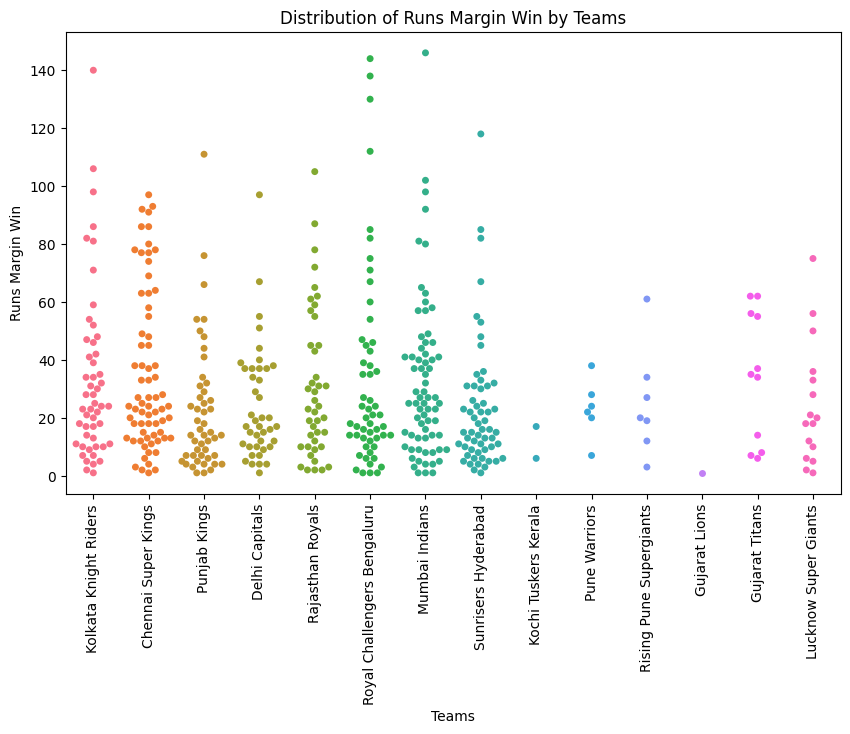

In [173]:
plt.figure(figsize = (10,6))
sns.swarmplot(x = "winner",y = "result_margin",data = df_result_as_runs,hue = "winner",size = 5,edgecolor = "black")
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Runs Margin Win")
plt.title("Distribution of Runs Margin Win by Teams")
plt.show()

In [179]:
teams_and_their_avg_runs_margin_win

,Team,Average Run Margin Win
0,Chennai Super Kings,36
1,Delhi Capitals,24
2,Gujarat Lions,1
3,Gujarat Titans,34
4,Kochi Tuskers Kerala,12
5,Kolkata Knight Riders,34
6,Lucknow Super Giants,24
7,Mumbai Indians,33
8,Pune Warriors,23
9,Punjab Kings,23


/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/1820972604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Team",y = "Average Run Margin Win",data = teams_and_their_avg_runs_margin_win,palette = "magma")


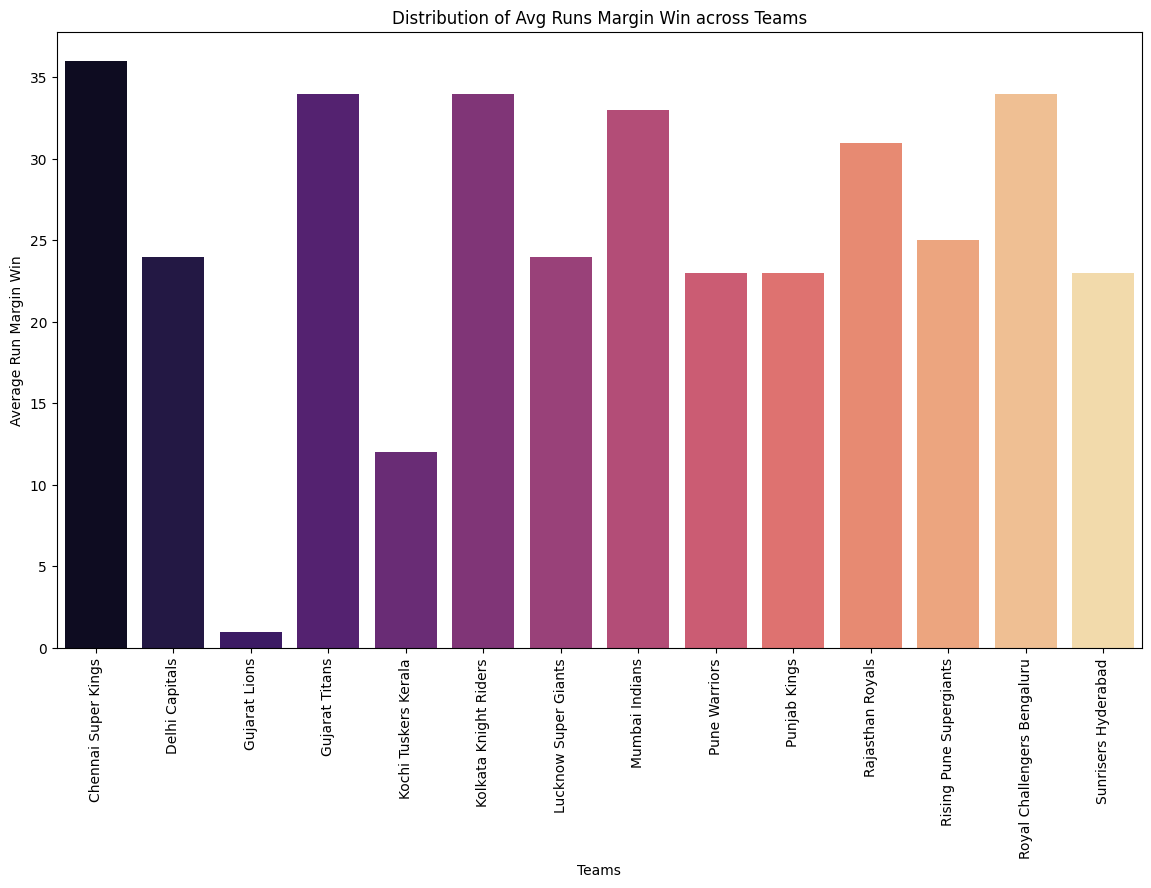

In [183]:
plt.figure(figsize = (14,8))
sns.barplot(x = "Team",y = "Average Run Margin Win",data = teams_and_their_avg_runs_margin_win,palette = "magma")
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Average Run Margin Win")
plt.title("Distribution of Avg Runs Margin Win across Teams")
plt.show()

/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/240937246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Team",y = "Average Wickets Remaining Win",data = teams_and_their_avg_wickets_remaining_win,palette = "plasma")


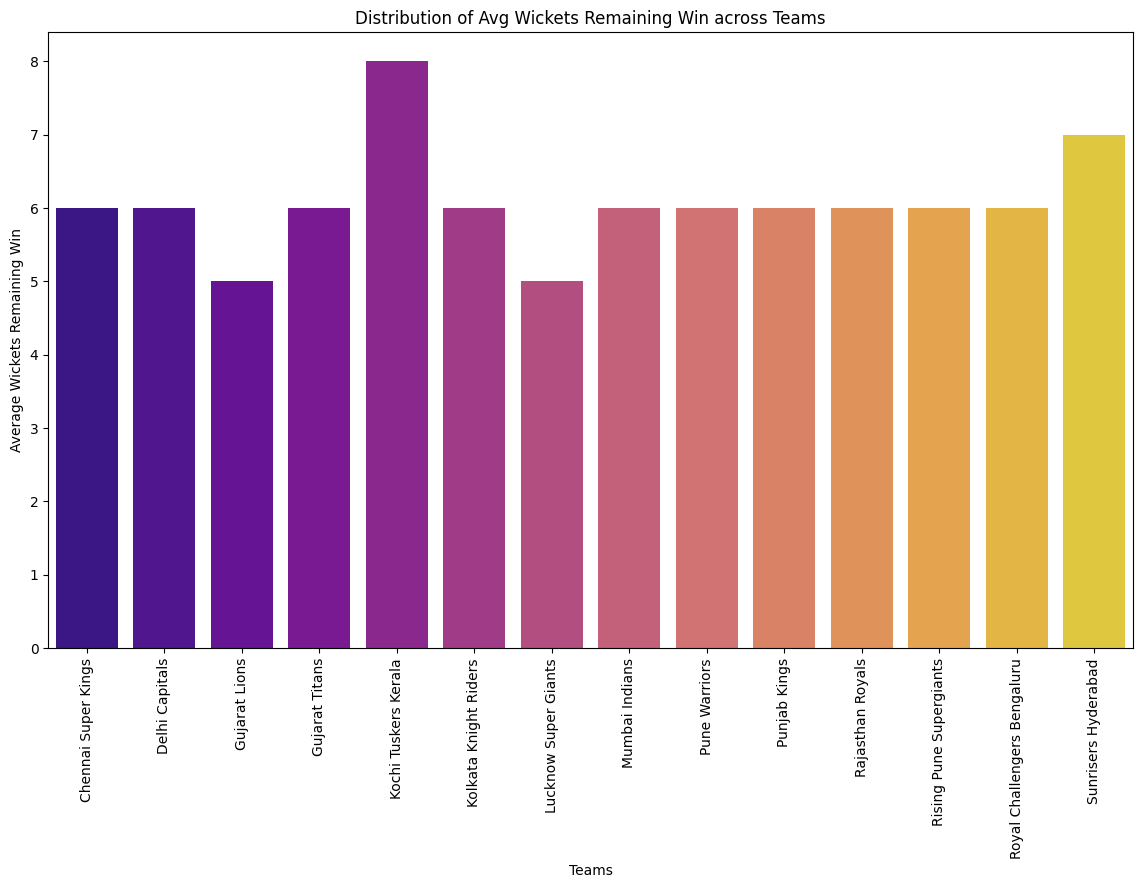

In [185]:
plt.figure(figsize = (14,8))
sns.barplot(x = "Team",y = "Average Wickets Remaining Win",data = teams_and_their_avg_wickets_remaining_win,palette = "plasma")
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Average Wickets Remaining Win")
plt.title("Distribution of Avg Wickets Remaining Win across Teams")
plt.show()

In [186]:
df_result_as_runs.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full
7,335989,2007/08,Chennai,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6,209,20.0,No,Normal,DJ Harper,GA Pratapkumar,2008,4,23,Win,Loss,Full
9,335991,2007/08,Chandigarh,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Mumbai Indians,Mumbai Indians,field,Punjab Kings,runs,66,183,20.0,No,Normal,Aleem Dar,AM Saheba,2008,4,25,Win,Loss,Full
14,335996,2007/08,Bangalore,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13,179,20.0,No,Normal,BR Doctrove,RB Tiffin,2008,4,28,Loss,Win,Full


In [188]:
df_result_as_runs['looser'] = np.where(df_result_as_runs['winner'] == df_result_as_runs['team1'],df_result_as_runs['team2'],df_result_as_runs['team1'])

/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/887486481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_as_runs['looser'] = np.where(df_result_as_runs['winner'] == df_result_as_runs['team1'],df_result_as_runs['team2'],df_result_as_runs['team1'])


In [189]:
df_result_as_runs.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,looser
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full,Royal Challengers Bengaluru
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full,Punjab Kings
7,335989,2007/08,Chennai,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6,209,20.0,No,Normal,DJ Harper,GA Pratapkumar,2008,4,23,Win,Loss,Full,Mumbai Indians
9,335991,2007/08,Chandigarh,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Mumbai Indians,Mumbai Indians,field,Punjab Kings,runs,66,183,20.0,No,Normal,Aleem Dar,AM Saheba,2008,4,25,Win,Loss,Full,Mumbai Indians
14,335996,2007/08,Bangalore,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13,179,20.0,No,Normal,BR Doctrove,RB Tiffin,2008,4,28,Loss,Win,Full,Royal Challengers Bengaluru


/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


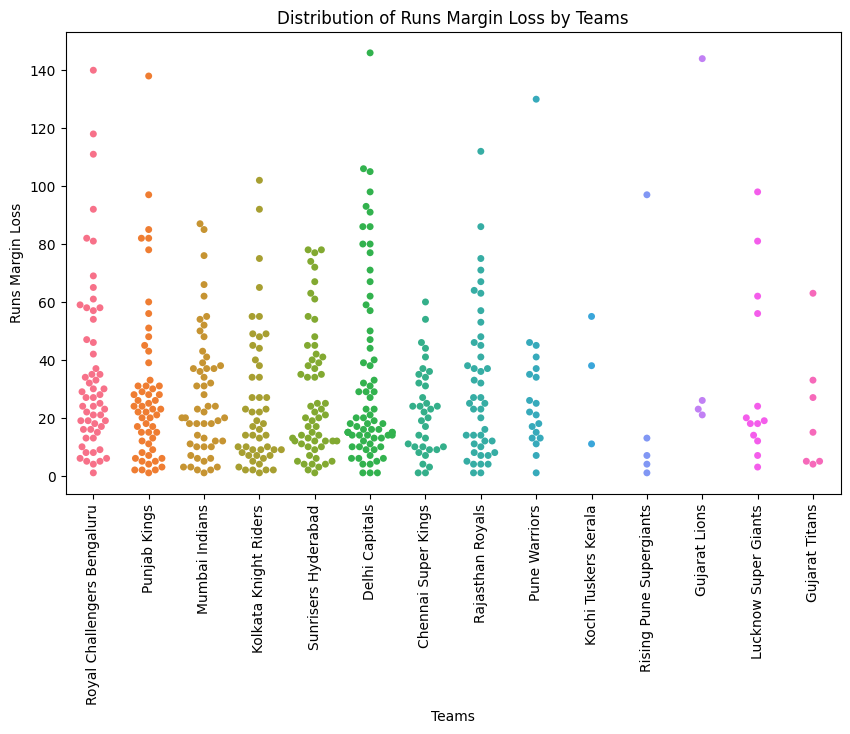

In [193]:
plt.figure(figsize = (10,6))
sns.swarmplot(x = "looser",y = "result_margin",data = df_result_as_runs,hue = "looser",edgecolor = "black")
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Runs Margin Loss")
plt.title("Distribution of Runs Margin Loss by Teams")
plt.show()

In [194]:
df_result_as_wickets['looser'] = np.where(df_result_as_wickets['winner'] == df_result_as_wickets['team1'],df_result_as_wickets['team2'],df_result_as_wickets['team1'])

/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/3785577677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_as_wickets['looser'] = np.where(df_result_as_wickets['winner'] == df_result_as_wickets['team1'],df_result_as_wickets['team2'],df_result_as_wickets['team1'])


In [199]:
df_result_as_wickets.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,looser
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss,Full,Rajasthan Royals
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full,Mumbai Indians
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss,Full,Sunrisers Hyderabad
5,335987,2007/08,Jaipur,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Punjab Kings,Punjab Kings,bat,Rajasthan Royals,wickets,6,167,20.0,No,Normal,Aleem Dar,RB Tiffin,2008,4,21,Win,Loss,Full,Punjab Kings
6,335988,2007/08,Hyderabad,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,Delhi Capitals,wickets,9,143,20.0,No,Normal,IL Howell,AM Saheba,2008,4,22,Loss,Win,Full,Sunrisers Hyderabad


In [220]:
df_result_as_wickets['toss looser'] = np.where(df_result_as_wickets['toss_winner'] == df_result_as_wickets['team1'],df_result_as_wickets['team2'],df_result_as_wickets['team1'] )

/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/3754994656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_as_wickets['toss looser'] = np.where(df_result_as_wickets['toss_winner'] == df_result_as_wickets['team1'],df_result_as_wickets['team2'],df_result_as_wickets['team1'] )


In [222]:
df_result_as_wickets.tail()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,looser,toss looser
1087,1426303,2024,Guwahati,League,SM Curran,"Barsapara Cricket Stadium, Guwahati",Rajasthan Royals,Punjab Kings,Rajasthan Royals,bat,Punjab Kings,wickets,5,145,20.0,No,Normal,R Pandit,MV Saidharshan Kumar,2024,5,15,Loss,Win,Full,Rajasthan Royals,Punjab Kings
1090,1426307,2024,Hyderabad,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4,215,20.0,No,Normal,Nitin Menon,VK Sharma,2024,5,19,Loss,Win,Full,Punjab Kings,Sunrisers Hyderabad
1091,1426309,2024,Ahmedabad,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8,160,20.0,No,Normal,AK Chaudhary,R Pandit,2024,5,21,Loss,Win,Full,Sunrisers Hyderabad,Kolkata Knight Riders
1092,1426310,2024,Ahmedabad,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4,173,20.0,No,Normal,KN Ananthapadmanabhan,MV Saidharshan Kumar,2024,5,22,Loss,Win,Full,Royal Challengers Bengaluru,Royal Challengers Bengaluru
1094,1426312,2024,Chennai,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8,114,20.0,No,Normal,J Madanagopal,Nitin Menon,2024,5,26,Loss,Win,Full,Sunrisers Hyderabad,Kolkata Knight Riders


In [224]:
df_result_as_wickets['First Batting Team'] = np.where(df_result_as_wickets['toss_decision'] == "bat",df_result_as_wickets['toss_winner'],df_result_as_wickets['toss looser'])

/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/2317519637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_as_wickets['First Batting Team'] = np.where(df_result_as_wickets['toss_decision'] == "bat",df_result_as_wickets['toss_winner'],df_result_as_wickets['toss looser'])


In [229]:
df_result_as_wickets['Second Batting Team'] = np.where(df_result_as_wickets['First Batting Team'] == df_result_as_wickets['team1'],df_result_as_wickets['team2'],df_result_as_wickets['team1'])

/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/595997412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_as_wickets['Second Batting Team'] = np.where(df_result_as_wickets['First Batting Team'] == df_result_as_wickets['team1'],df_result_as_wickets['team2'],df_result_as_wickets['team1'])


In [230]:
df_result_as_wickets.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,looser,toss looser,First Batting Team,Second Batting Team
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss,Full,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,Delhi Capitals
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,Royal Challengers Bengaluru
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss,Full,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders
5,335987,2007/08,Jaipur,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Punjab Kings,Punjab Kings,bat,Rajasthan Royals,wickets,6,167,20.0,No,Normal,Aleem Dar,RB Tiffin,2008,4,21,Win,Loss,Full,Punjab Kings,Rajasthan Royals,Punjab Kings,Rajasthan Royals
6,335988,2007/08,Hyderabad,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,Delhi Capitals,wickets,9,143,20.0,No,Normal,IL Howell,AM Saheba,2008,4,22,Loss,Win,Full,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals


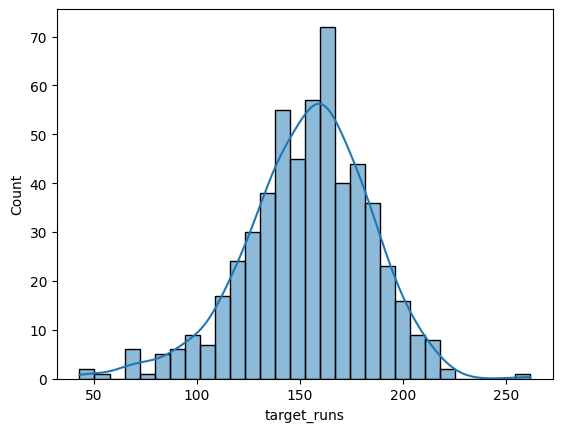

In [232]:
sns.histplot(df_result_as_wickets['target_runs'], bins=30, kde=True)
plt.show()

In [239]:
teams_failing_to_defend_score = df_result_as_wickets.groupby(['First Batting Team'])['target_runs'].mean().reset_index(name = "Avg Runs Failed to Defend")
teams_failing_to_defend_score['Avg Runs Failed to Defend'] = np.round(teams_failing_to_defend_score['Avg Runs Failed to Defend']).astype(int)

In [240]:
teams_failing_to_defend_score

,First Batting Team,Avg Runs Failed to Defend
0,Chennai Super Kings,157
1,Delhi Capitals,146
2,Gujarat Lions,163
3,Gujarat Titans,167
4,Kochi Tuskers Kerala,145
5,Kolkata Knight Riders,152
6,Lucknow Super Giants,169
7,Mumbai Indians,155
8,Pune Warriors,143
9,Punjab Kings,154


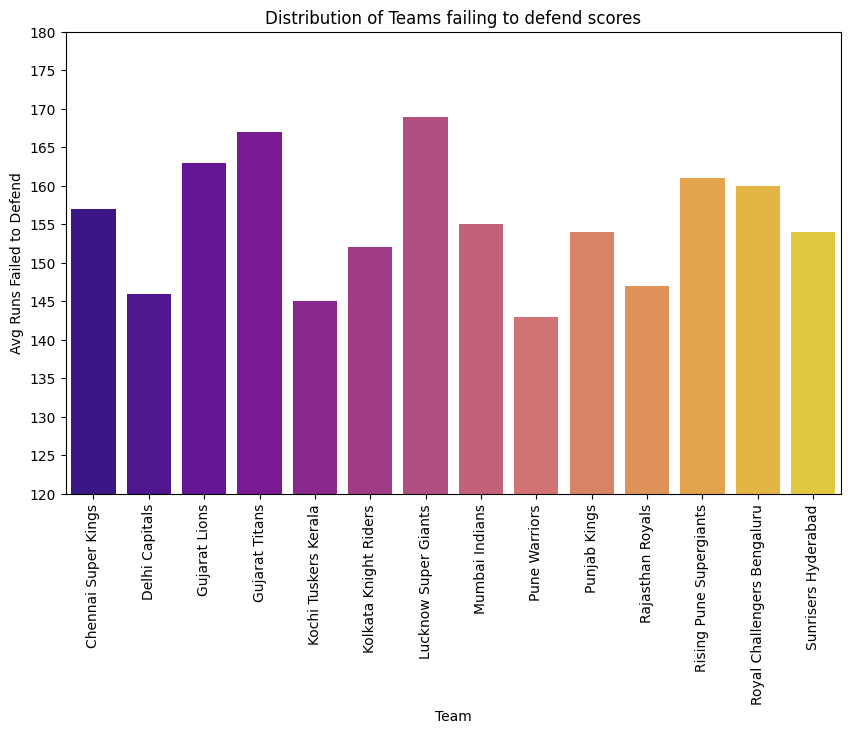

In [251]:
plt.figure(figsize = (10,6))
sns.barplot(x = "First Batting Team",y = "Avg Runs Failed to Defend",data = teams_failing_to_defend_score,hue = "First Batting Team",palette = "plasma")
plt.xticks(rotation = 90)
plt.ylim(120, 180)
plt.yticks(range(120, 181, 5))
plt.xlabel("Team")
plt.title("Distribution of Teams failing to defend scores")
plt.show()

In [252]:
df_result_as_wickets.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,looser,toss looser,First Batting Team,Second Batting Team
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss,Full,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,Delhi Capitals
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,Royal Challengers Bengaluru
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss,Full,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders
5,335987,2007/08,Jaipur,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Punjab Kings,Punjab Kings,bat,Rajasthan Royals,wickets,6,167,20.0,No,Normal,Aleem Dar,RB Tiffin,2008,4,21,Win,Loss,Full,Punjab Kings,Rajasthan Royals,Punjab Kings,Rajasthan Royals
6,335988,2007/08,Hyderabad,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,Delhi Capitals,wickets,9,143,20.0,No,Normal,IL Howell,AM Saheba,2008,4,22,Loss,Win,Full,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals


In [254]:
teams_chasing_the_target = df_result_as_wickets.groupby(['Second Batting Team'])['target_runs'].mean().reset_index(name = "Avg Runs Successfully Chased")
teams_chasing_the_target['Avg Runs Successfully Chased'] = np.round(teams_chasing_the_target['Avg Runs Successfully Chased']).astype(int)
teams_chasing_the_target

,Second Batting Team,Avg Runs Successfully Chased
0,Chennai Super Kings,155
1,Delhi Capitals,150
2,Gujarat Lions,166
3,Gujarat Titans,167
4,Kochi Tuskers Kerala,139
5,Kolkata Knight Riders,149
6,Lucknow Super Giants,176
7,Mumbai Indians,157
8,Pune Warriors,137
9,Punjab Kings,159


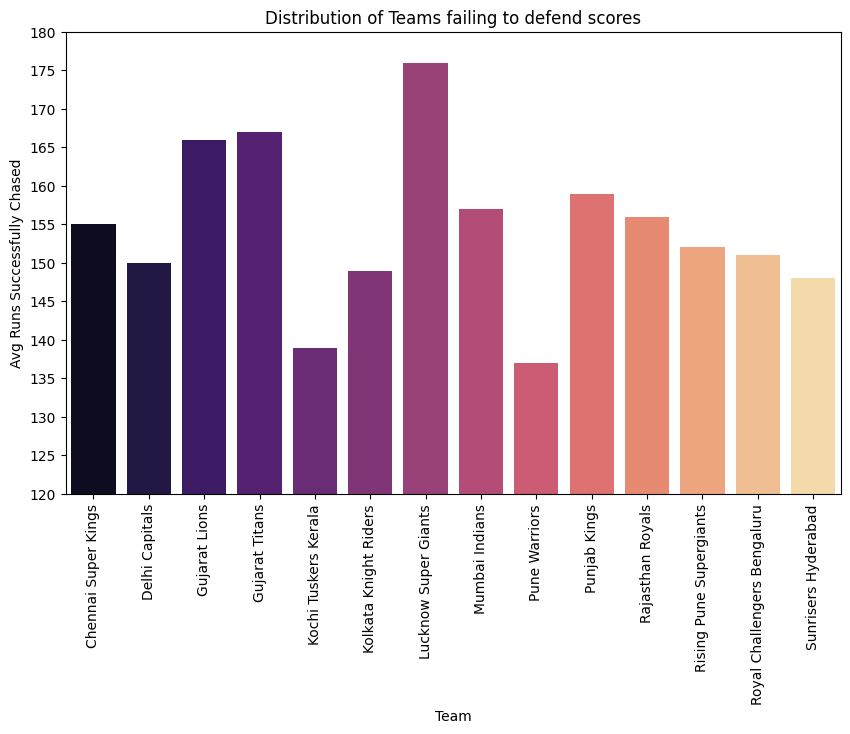

In [255]:
plt.figure(figsize = (10,6))
sns.barplot(x = "Second Batting Team",y = "Avg Runs Successfully Chased",data = teams_chasing_the_target,hue = "Second Batting Team",palette = "magma")
plt.xticks(rotation = 90)
plt.ylim(120, 180)
plt.yticks(range(120, 181, 5))
plt.xlabel("Team")
plt.title("Distribution of Teams failing to defend scores")
plt.show()

In [256]:
df_result_as_runs.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,looser
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full,Royal Challengers Bengaluru
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full,Punjab Kings
7,335989,2007/08,Chennai,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6,209,20.0,No,Normal,DJ Harper,GA Pratapkumar,2008,4,23,Win,Loss,Full,Mumbai Indians
9,335991,2007/08,Chandigarh,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Mumbai Indians,Mumbai Indians,field,Punjab Kings,runs,66,183,20.0,No,Normal,Aleem Dar,AM Saheba,2008,4,25,Win,Loss,Full,Mumbai Indians
14,335996,2007/08,Bangalore,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13,179,20.0,No,Normal,BR Doctrove,RB Tiffin,2008,4,28,Loss,Win,Full,Royal Challengers Bengaluru


In [257]:
df_result_as_runs['toss looser'] = np.where(df_result_as_runs['toss_winner'] == df_result_as_runs['team1'],df_result_as_runs['team2'],df_result_as_runs['team1'])
df_result_as_runs['First Batting Team'] = np.where(df_result_as_runs['toss_decision'] == "bat",df_result_as_runs['toss_winner'],df_result_as_runs['toss looser'])
df_result_as_runs['Second Batting Team'] = np.where(df_result_as_runs['First Batting Team'] == df_result_as_runs['team1'],df_result_as_runs['team2'],df_result_as_runs['team1'])

/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/2855075456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_as_runs['toss looser'] = np.where(df_result_as_runs['toss_winner'] == df_result_as_runs['team1'],df_result_as_runs['team2'],df_result_as_runs['team1'])
/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/2855075456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_as_runs['First Batting Team'] = np.where(df_result_as_runs['toss_decision'] == "bat",df_

In [258]:
df_result_as_runs.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,looser,toss looser,First Batting Team,Second Batting Team
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bengaluru
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full,Punjab Kings,Punjab Kings,Chennai Super Kings,Punjab Kings
7,335989,2007/08,Chennai,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6,209,20.0,No,Normal,DJ Harper,GA Pratapkumar,2008,4,23,Win,Loss,Full,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,Mumbai Indians
9,335991,2007/08,Chandigarh,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Mumbai Indians,Mumbai Indians,field,Punjab Kings,runs,66,183,20.0,No,Normal,Aleem Dar,AM Saheba,2008,4,25,Win,Loss,Full,Mumbai Indians,Punjab Kings,Punjab Kings,Mumbai Indians
14,335996,2007/08,Bangalore,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13,179,20.0,No,Normal,BR Doctrove,RB Tiffin,2008,4,28,Loss,Win,Full,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Chennai Super Kings,Royal Challengers Bengaluru


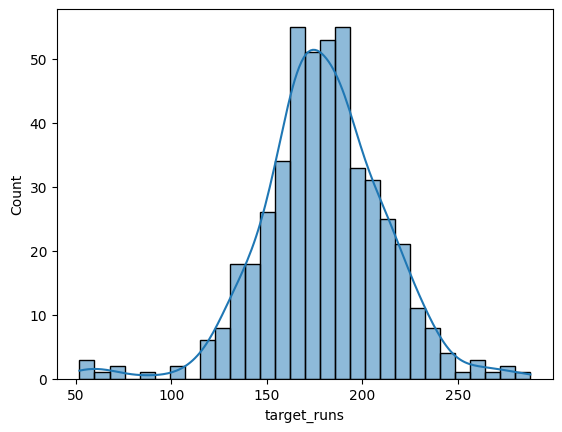

In [259]:
sns.histplot(df_result_as_runs['target_runs'], bins=30, kde=True)
plt.show()

In [260]:
df_result_as_runs.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,looser,toss looser,First Batting Team,Second Batting Team
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bengaluru
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full,Punjab Kings,Punjab Kings,Chennai Super Kings,Punjab Kings
7,335989,2007/08,Chennai,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6,209,20.0,No,Normal,DJ Harper,GA Pratapkumar,2008,4,23,Win,Loss,Full,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,Mumbai Indians
9,335991,2007/08,Chandigarh,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Mumbai Indians,Mumbai Indians,field,Punjab Kings,runs,66,183,20.0,No,Normal,Aleem Dar,AM Saheba,2008,4,25,Win,Loss,Full,Mumbai Indians,Punjab Kings,Punjab Kings,Mumbai Indians
14,335996,2007/08,Bangalore,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13,179,20.0,No,Normal,BR Doctrove,RB Tiffin,2008,4,28,Loss,Win,Full,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Chennai Super Kings,Royal Challengers Bengaluru


In [261]:
teams_and_their_defending_ability = df_result_as_runs.groupby(['First Batting Team'])['target_runs'].mean().reset_index(name = "Avg Runs Successfully Defending")

In [263]:
teams_and_their_defending_ability['Avg Runs Successfully Defending'] = np.round(teams_and_their_defending_ability['Avg Runs Successfully Defending']).astype(int)

In [264]:
teams_and_their_defending_ability

,First Batting Team,Avg Runs Successfully Defending
0,Chennai Super Kings,183
1,Delhi Capitals,181
2,Gujarat Lions,173
3,Gujarat Titans,188
4,Kochi Tuskers Kerala,145
5,Kolkata Knight Riders,178
6,Lucknow Super Giants,188
7,Mumbai Indians,179
8,Pune Warriors,166
9,Punjab Kings,175


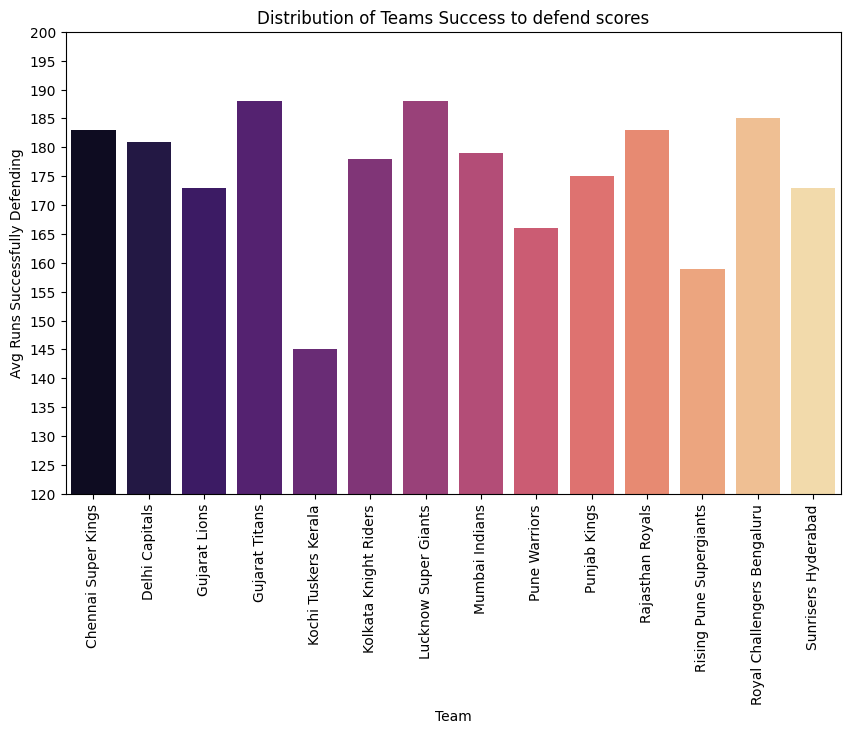

In [267]:
plt.figure(figsize = (10,6))
sns.barplot(x = "First Batting Team",y = "Avg Runs Successfully Defending",data = teams_and_their_defending_ability,hue = "First Batting Team",palette = "magma")
plt.xticks(rotation = 90)
plt.ylim(120, 200)
plt.yticks(range(120, 201, 5))
plt.xlabel("Team")
plt.title("Distribution of Teams Success to defend scores")
plt.show()

In [269]:
df_result_as_runs.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,looser,toss looser,First Batting Team,Second Batting Team
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bengaluru
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full,Punjab Kings,Punjab Kings,Chennai Super Kings,Punjab Kings
7,335989,2007/08,Chennai,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6,209,20.0,No,Normal,DJ Harper,GA Pratapkumar,2008,4,23,Win,Loss,Full,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,Mumbai Indians
9,335991,2007/08,Chandigarh,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Mumbai Indians,Mumbai Indians,field,Punjab Kings,runs,66,183,20.0,No,Normal,Aleem Dar,AM Saheba,2008,4,25,Win,Loss,Full,Mumbai Indians,Punjab Kings,Punjab Kings,Mumbai Indians
14,335996,2007/08,Bangalore,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13,179,20.0,No,Normal,BR Doctrove,RB Tiffin,2008,4,28,Loss,Win,Full,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Chennai Super Kings,Royal Challengers Bengaluru


In [270]:
df_result_as_runs['Match Excitement Type'] = np.where(df_result_as_runs['result_margin'] < 11,"Close","One Sided")

/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/708432168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_as_runs['Match Excitement Type'] = np.where(df_result_as_runs['result_margin'] < 11,"Close","One Sided")


In [271]:
df_result_as_runs.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,looser,toss looser,First Batting Team,Second Batting Team,Match Excitement Type
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bengaluru,One Sided
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full,Punjab Kings,Punjab Kings,Chennai Super Kings,Punjab Kings,One Sided
7,335989,2007/08,Chennai,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6,209,20.0,No,Normal,DJ Harper,GA Pratapkumar,2008,4,23,Win,Loss,Full,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,Mumbai Indians,Close
9,335991,2007/08,Chandigarh,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Mumbai Indians,Mumbai Indians,field,Punjab Kings,runs,66,183,20.0,No,Normal,Aleem Dar,AM Saheba,2008,4,25,Win,Loss,Full,Mumbai Indians,Punjab Kings,Punjab Kings,Mumbai Indians,One Sided
14,335996,2007/08,Bangalore,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13,179,20.0,No,Normal,BR Doctrove,RB Tiffin,2008,4,28,Loss,Win,Full,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Chennai Super Kings,Royal Challengers Bengaluru,One Sided


In [285]:
df_close_matches = df_result_as_runs[df_result_as_runs['Match Excitement Type'] == "Close"]
df_close_matches.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,looser,toss looser,First Batting Team,Second Batting Team,Match Excitement Type
7,335989,2007/08,Chennai,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6,209,20.0,No,Normal,DJ Harper,GA Pratapkumar,2008,4,23,Win,Loss,Full,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,Mumbai Indians,Close
16,335998,2007/08,Delhi,League,GD McGrath,Feroz Shah Kotla,Delhi Capitals,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,Delhi Capitals,runs,10,192,20.0,No,Normal,Aleem Dar,I Shivram,2008,4,30,Win,Loss,Full,Royal Challengers Bengaluru,Delhi Capitals,Delhi Capitals,Royal Challengers Bengaluru,Close
20,336003,2007/08,Chandigarh,League,IK Pathan,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Kolkata Knight Riders,Punjab Kings,bat,Punjab Kings,runs,9,179,20.0,No,Normal,DJ Harper,I Shivram,2008,5,3,Win,Loss,Full,Kolkata Knight Riders,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders,Close
21,336034,2007/08,Bangalore,League,P Kumar,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Royal Challengers Bengaluru,runs,3,157,20.0,No,Normal,BR Doctrove,SL Shastri,2008,5,3,Win,Loss,Full,Sunrisers Hyderabad,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Sunrisers Hyderabad,Close
28,336010,2007/08,Kolkata,League,SC Ganguly,Eden Gardens,Kolkata Knight Riders,Royal Challengers Bengaluru,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,5,130,16.0,No,Normal,Asad Rauf,IL Howell,2008,5,8,Win,Loss,Full,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,Close


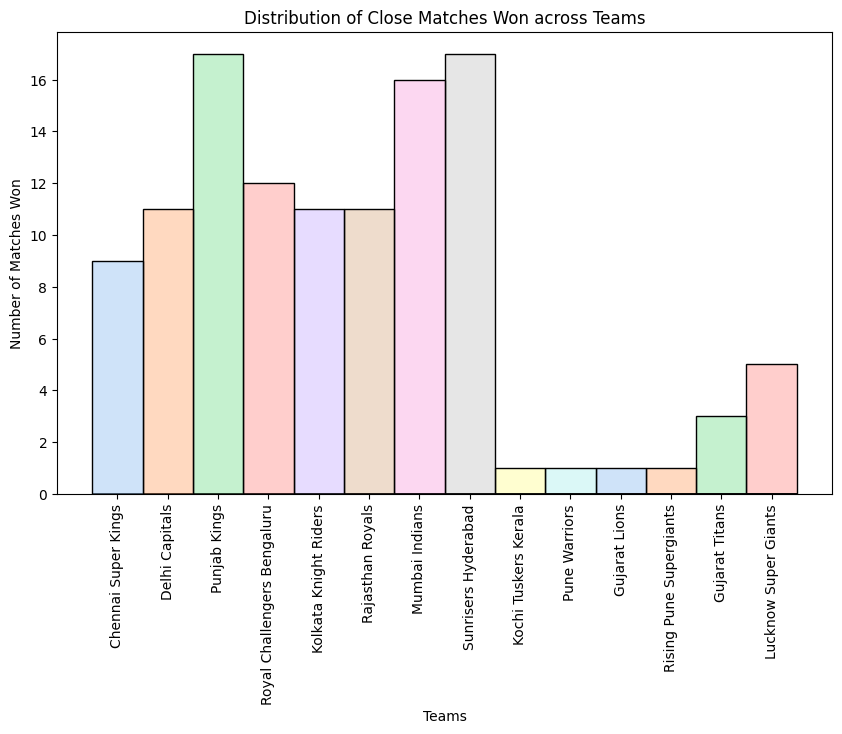

In [298]:
plt.figure(figsize = (10,6))
sns.histplot(x = "winner",data = df_close_matches,hue = "winner",palette = "pastel",legend = False,edgecolor = "black")
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Number of Matches Won")
plt.title("Distribution of Close Matches Won across Teams")
plt.show()

In [336]:
close_matches_won_by_runs = df_close_matches.groupby('winner').size()

In [337]:
close_matches_won_by_runs

winner
Chennai Super Kings             9
Delhi Capitals                 11
Gujarat Lions                   1
Gujarat Titans                  3
Kochi Tuskers Kerala            1
Kolkata Knight Riders          11
Lucknow Super Giants            5
Mumbai Indians                 16
Pune Warriors                   1
Punjab Kings                   17
Rajasthan Royals               11
Rising Pune Supergiants         1
Royal Challengers Bengaluru    12
Sunrisers Hyderabad            17
dtype: int64

In [332]:
df_result_as_wickets.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,looser,toss looser,First Batting Team,Second Batting Team
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss,Full,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,Delhi Capitals
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,Royal Challengers Bengaluru
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss,Full,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders
5,335987,2007/08,Jaipur,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Punjab Kings,Punjab Kings,bat,Rajasthan Royals,wickets,6,167,20.0,No,Normal,Aleem Dar,RB Tiffin,2008,4,21,Win,Loss,Full,Punjab Kings,Rajasthan Royals,Punjab Kings,Rajasthan Royals
6,335988,2007/08,Hyderabad,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,Delhi Capitals,wickets,9,143,20.0,No,Normal,IL Howell,AM Saheba,2008,4,22,Loss,Win,Full,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals


In [333]:
df_result_as_wickets['Match Excitement Type'] = np.where(df_result_as_wickets['result_margin'] < 4,"Close","One Sided")

/var/folders/cr/nsmtzvws1dd3gq7d3vnrz2c80000gn/T/ipykernel_986/423472327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_as_wickets['Match Excitement Type'] = np.where(df_result_as_wickets['result_margin'] < 4,"Close","One Sided")


In [335]:
df_close_matches_by_wickets = df_result_as_wickets[df_result_as_wickets['Match Excitement Type'] == "Close"]
df_close_matches_by_wickets.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match,looser,toss looser,First Batting Team,Second Batting Team,Match Excitement Type
8,335990,2007/08,Hyderabad,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3,215,20.0,No,Normal,Asad Rauf,MR Benson,2008,4,24,Loss,Win,Full,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,Rajasthan Royals,Close
32,336015,2007/08,Jaipur,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,field,Rajasthan Royals,wickets,3,157,20.0,No,Normal,SJ Davis,RE Koertzen,2008,5,11,Win,Loss,Full,Delhi Capitals,Delhi Capitals,Delhi Capitals,Rajasthan Royals,Close
50,336035,2007/08,Kolkata,League,Umar Gul,Eden Gardens,Kolkata Knight Riders,Punjab Kings,Punjab Kings,bat,Kolkata Knight Riders,wickets,3,175,20.0,No,Normal,SJ Davis,I Shivram,2008,5,25,Win,Loss,Full,Punjab Kings,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders,Close
57,336040,2007/08,Mumbai,Final,YK Pathan,Dr DY Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3,164,20.0,No,Normal,BF Bowden,RE Koertzen,2008,6,1,Loss,Win,Full,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,Rajasthan Royals,Close
80,392205,2009,Port Elizabeth,League,YK Pathan,St George's Park,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,Rajasthan Royals,wickets,3,142,20.0,No,Normal,S Asnani,BG Jerling,2009,5,2,Loss,Win,Full,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,Close


In [340]:
close_matches_won_by_wickets = df_close_matches_by_wickets.groupby('winner').size()
close_matches_won_by_wickets

winner
Chennai Super Kings             5
Delhi Capitals                  4
Gujarat Lions                   2
Gujarat Titans                  3
Kolkata Knight Riders           7
Lucknow Super Giants            1
Mumbai Indians                  2
Punjab Kings                    3
Rajasthan Royals               11
Royal Challengers Bengaluru     5
Sunrisers Hyderabad             2
dtype: int64

In [341]:
close_matches_won_by_runs

winner
Chennai Super Kings             9
Delhi Capitals                 11
Gujarat Lions                   1
Gujarat Titans                  3
Kochi Tuskers Kerala            1
Kolkata Knight Riders          11
Lucknow Super Giants            5
Mumbai Indians                 16
Pune Warriors                   1
Punjab Kings                   17
Rajasthan Royals               11
Rising Pune Supergiants         1
Royal Challengers Bengaluru    12
Sunrisers Hyderabad            17
dtype: int64

In [348]:
total_close_matches_won = close_matches_won_by_wickets.add(close_matches_won_by_runs, fill_value=0)
total_close_matches_won

winner
Chennai Super Kings            14.0
Delhi Capitals                 15.0
Gujarat Lions                   3.0
Gujarat Titans                  6.0
Kochi Tuskers Kerala            1.0
Kolkata Knight Riders          18.0
Lucknow Super Giants            6.0
Mumbai Indians                 18.0
Pune Warriors                   1.0
Punjab Kings                   20.0
Rajasthan Royals               22.0
Rising Pune Supergiants         1.0
Royal Challengers Bengaluru    17.0
Sunrisers Hyderabad            19.0
dtype: float64

In [363]:
total_close_matches_won = pd.DataFrame(total_close_matches_won).reset_index()

In [366]:
total_close_matches_won.rename(columns = {'Number of Wins':'Number of Close Wins','winner':'Team'},inplace=True)

In [367]:
total_close_matches_won['Number of Close Wins'] = total_close_matches_won['Number of Close Wins'].astype(int)

In [368]:
total_close_matches_won

,index,Team,Number of Close Wins
0,0,Chennai Super Kings,14
1,1,Delhi Capitals,15
2,2,Gujarat Lions,3
3,3,Gujarat Titans,6
4,4,Kochi Tuskers Kerala,1
5,5,Kolkata Knight Riders,18
6,6,Lucknow Super Giants,6
7,7,Mumbai Indians,18
8,8,Pune Warriors,1
9,9,Punjab Kings,20


In [369]:
close_matches_lost1 = df_close_matches.groupby('looser').size()
close_matches_lost1

looser
Chennai Super Kings            11
Delhi Capitals                 15
Gujarat Titans                  3
Kolkata Knight Riders          20
Lucknow Super Giants            2
Mumbai Indians                 13
Pune Warriors                   2
Punjab Kings                   13
Rajasthan Royals               11
Rising Pune Supergiants         3
Royal Challengers Bengaluru    10
Sunrisers Hyderabad            13
dtype: int64

In [371]:
close_matches_lost2 = df_close_matches_by_wickets.groupby('looser').size()
close_matches_lost2

looser
Chennai Super Kings            5
Delhi Capitals                 7
Gujarat Lions                  1
Gujarat Titans                 3
Kolkata Knight Riders          5
Lucknow Super Giants           1
Mumbai Indians                 6
Pune Warriors                  1
Punjab Kings                   6
Rajasthan Royals               1
Rising Pune Supergiants        2
Royal Challengers Bengaluru    2
Sunrisers Hyderabad            5
dtype: int64

In [374]:
total_close_matches_lost = close_matches_lost2.add(close_matches_lost1,fill_value = 0)
total_close_matches_lost = pd.DataFrame(total_close_matches_lost).reset_index()

In [376]:
total_close_matches_lost.rename(columns = {0:'Number of Close Loses','looser':'Team'},inplace=True)

In [377]:
total_close_matches_lost['Number of Close Loses'] = total_close_matches_lost['Number of Close Loses'].astype(int)

In [378]:
total_close_matches_lost

,Team,Number of Close Loses
0,Chennai Super Kings,16
1,Delhi Capitals,22
2,Gujarat Lions,1
3,Gujarat Titans,6
4,Kolkata Knight Riders,25
5,Lucknow Super Giants,3
6,Mumbai Indians,19
7,Pune Warriors,3
8,Punjab Kings,19
9,Rajasthan Royals,12


In [380]:
total_close_matches_won.drop(columns = {'index'},inplace=True)

In [381]:
total_close_matches_won

,Team,Number of Close Wins
0,Chennai Super Kings,14
1,Delhi Capitals,15
2,Gujarat Lions,3
3,Gujarat Titans,6
4,Kochi Tuskers Kerala,1
5,Kolkata Knight Riders,18
6,Lucknow Super Giants,6
7,Mumbai Indians,18
8,Pune Warriors,1
9,Punjab Kings,20


In [382]:
team_performance_in_close_matches = pd.merge(total_close_matches_won,total_close_matches_lost,on = "Team")
team_performance_in_close_matches

,Team,Number of Close Wins,Number of Close Loses
0,Chennai Super Kings,14,16
1,Delhi Capitals,15,22
2,Gujarat Lions,3,1
3,Gujarat Titans,6,6
4,Kolkata Knight Riders,18,25
5,Lucknow Super Giants,6,3
6,Mumbai Indians,18,19
7,Pune Warriors,1,3
8,Punjab Kings,20,19
9,Rajasthan Royals,22,12


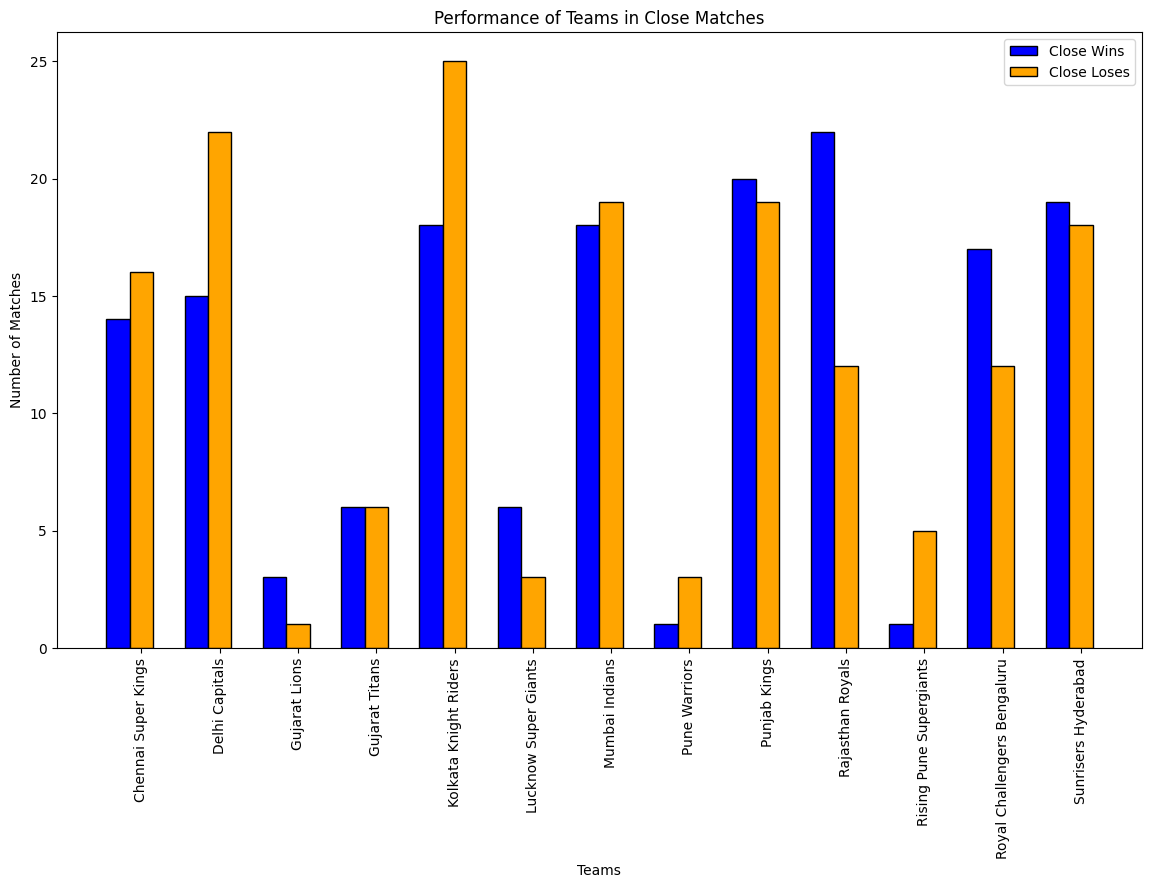

In [402]:
plt.figure(figsize = (14,8))
x = np.arange(len(team_performance_in_close_matches))
width = 0.3
plt.bar(x - 0.3,team_performance_in_close_matches['Number of Close Wins'],width,edgecolor = "black",color = "blue")
plt.bar(x,team_performance_in_close_matches['Number of Close Loses'],width,edgecolor = "black",color = "orange")
plt.xticks(x,team_performance_in_close_matches['Team'],rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Number of Matches")
plt.title("Performance of Teams in Close Matches")
plt.legend(["Close Wins","Close Loses"])
plt.show()